In [1]:
import pandas as pd 
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
from matplotlib import colors
from sqlite3 import Error


In [2]:
#reading the csv file from milestone2 to a dataframe
csv_data = pd.read_csv('csv_dataset.csv')
csv_data.head(20)

,Unnamed: 0,COVID_status,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21
0,0,confirmed,Afghanistan,0,0,0,0,0,0,0,...,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492
1,1,confirmed,Albania,0,0,0,0,0,0,0,...,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075
2,2,confirmed,Algeria,0,0,0,0,0,0,0,...,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711
3,3,confirmed,Andorra,0,0,0,0,0,0,0,...,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503
4,4,confirmed,Angola,0,0,0,0,0,0,0,...,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366
5,5,confirmed,Antigua and Barbuda,0,0,0,0,0,0,0,...,277,288,299,316,316,350,381,419,427,427
6,6,confirmed,Argentina,0,0,0,0,0,0,0,...,1970009,1976689,1980347,1985501,1993295,2001034,2008345,2015496,2021553,2025798
7,7,confirmed,Armenia,0,0,0,0,0,0,0,...,167726,167937,168088,168177,168300,168496,168676,168830,169022,169167
8,8,confirmed,Australia,0,0,0,0,4,5,5,...,28848,28851,28857,28860,28871,28879,28887,28892,28898,28900
9,9,confirmed,Austria,0,0,0,0,0,0,0,...,421189,422522,423839,424896,426093,427562,429139,430870,432303,433487


In [3]:
#reading the web data saved as csv file from milestone3 to a dataframe
web_data = pd.read_csv('web_dataset.csv')
web_data.head(20)

,Unnamed: 0,Country_Other,Continent,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_per_1_million_pop,Deaths_per_1_million_pop,Total_Tests,Tests_per_1_million_pop,Population
0,0,North America,North America,"32,404,817","+35,560","718,463","+1,063","21,644,999","10,041,355","26,054",NaN,NaN,NaN,NaN,NaN
1,1,Asia,Asia,"24,092,334","+58,199","386,420",+669,"22,644,994","1,060,920","22,369",NaN,NaN,NaN,NaN,NaN
2,2,South America,South America,"16,939,823","+9,995","442,266",+229,"15,259,788","1,237,769","20,004",NaN,NaN,NaN,NaN,NaN
3,3,Europe,Europe,"32,319,001","+75,431","768,786","+2,085","19,137,307","12,412,908","27,321",NaN,NaN,NaN,NaN,NaN
4,4,Africa,Africa,"3,779,905","+4,390","98,713",+112,"3,307,963","373,229","2,440",NaN,NaN,NaN,NaN,NaN
5,5,Oceania,Australia/Oceania,"50,557",+8,"1,080",NaN,"34,208","15,269",5,NaN,NaN,NaN,NaN,NaN
6,6,World,All,"109,587,158","+183,583","2,415,743","+4,158","82,029,965","25,141,450","98,193","14,059",309.9,NaN,NaN,NaN
7,7,USA,North America,"28,291,581","+28,457","497,761",+554,"18,296,130","9,497,690","19,387","85,161","1,498","335,804,261","1,010,806","332,214,450"
8,8,India,Asia,"10,925,208","+9,036","155,836",+72,"10,630,779","138,593","8,944","7,869",112,"206,230,512","148,532","1,388,456,735"
9,9,Brazil,South America,"9,840,002","+5,489","239,359",+65,"8,745,424","855,219","8,318","46,089","1,121","28,600,000","133,957","213,502,116"


In [4]:
web_data.dtypes

Unnamed: 0                      int64
Country_Other                  object
Continent                      object
Total_Cases                    object
New_Cases                      object
Total_Deaths                   object
New_Deaths                     object
Total_Recovered                object
Active_Cases                   object
Serious_Critical               object
Tot_Cases_per_1_million_pop    object
Deaths_per_1_million_pop       object
Total_Tests                    object
Tests_per_1_million_pop        object
Population                     object
dtype: object

In [5]:
web_data['Total_Cases'] = web_data['Total_Cases'].str.replace(",","")

In [6]:
web_data['Total_Cases'] = web_data['Total_Cases'].astype('int64')

In [7]:
web_data['New_Cases'] = web_data['New_Cases'].str.replace(",","")


In [8]:
web_data['New_Cases'] = web_data['New_Cases'].str.replace("NaN","")

In [9]:
web_data['New_Cases'] = web_data['New_Cases'].astype(np.float).astype("Int64")

In [10]:
web_data['Total_Recovered'] = web_data['Total_Recovered'].str.replace(",","")

In [11]:
web_data['Total_Recovered'] = web_data['Total_Recovered'].astype(np.float).astype("Int64")

In [12]:
web_data['Active_Cases'] = web_data['Active_Cases'].str.replace(",","")

In [13]:
web_data['Active_Cases'] = web_data['Active_Cases'].astype(np.float).astype("Int64")

In [14]:
web_data['Serious_Critical'] = web_data['Serious_Critical'].str.replace(",","")

In [15]:
web_data['Serious_Critical'] = web_data['Serious_Critical'].astype(np.float).astype("Int64")

In [16]:
web_data.dtypes


Unnamed: 0                      int64
Country_Other                  object
Continent                      object
Total_Cases                     int64
New_Cases                       Int64
Total_Deaths                   object
New_Deaths                     object
Total_Recovered                 Int64
Active_Cases                    Int64
Serious_Critical                Int64
Tot_Cases_per_1_million_pop    object
Deaths_per_1_million_pop       object
Total_Tests                    object
Tests_per_1_million_pop        object
Population                     object
dtype: object

In [17]:
#reading the API data saved as csv file from milestone4 to a dataframe
api_data = pd.read_csv('api_dataset.csv')
api_data.head(20)

,Unnamed: 0,Indicators,1/1/2021,1/4/2021,1/5/2021,1/6/2021,1/7/2021,1/8/2021,1/11/2021,1/12/2021,...,12/18/2020,12/21/2020,12/22/2020,12/23/2020,12/24/2020,12/28/2020,12/29/2020,12/30/2020,12/31/2020,Index_Name
0,0,date,NaN,1/4/2021 0:00,1/5/2021 0:00,1/6/2021 0:00,1/7/2021 0:00,1/8/2021 0:00,1/11/2021 0:00,1/12/2021 0:00,...,12/18/2020 0:00,12/21/2020 0:00,12/22/2020 0:00,12/23/2020 0:00,12/24/2020 0:00,12/28/2020 0:00,12/29/2020 0:00,12/30/2020 0:00,12/31/2020 0:00,NYA
1,1,close,NaN,14376.7002,14536.53027,14788.83984,14928.75,14966.83008,14937.95996,15010.29004,...,14467.82031,14378.84961,14321.33984,14398.62012,14382.5,14405.76953,14397.91992,14477.48047,14524.79981,NYA
2,2,date,NaN,1/4/2021 0:00,1/5/2021 0:00,1/6/2021 0:00,1/7/2021 0:00,1/8/2021 0:00,1/11/2021 0:00,1/12/2021 0:00,...,12/18/2020 0:00,12/21/2020 0:00,12/22/2020 0:00,12/23/2020 0:00,12/24/2020 0:00,12/28/2020 0:00,12/29/2020 0:00,12/30/2020 0:00,12/31/2020 0:00,DJI
3,3,close,NaN,30223.89063,30391.59961,30829.40039,31041.13086,31097.9707,31008.68945,31068.68945,...,30179.05078,30216.44922,30015.50977,30129.83008,30199.86914,30403.9707,30335.66992,30409.56055,30606.48047,DJI
4,4,date,NaN,NaN,1/5/2021 0:00,1/6/2021 0:00,1/7/2021 0:00,1/8/2021 0:00,1/11/2021 0:00,1/12/2021 0:00,...,12/18/2020 0:00,12/21/2020 0:00,12/22/2020 0:00,12/23/2020 0:00,NaN,NaN,12/29/2020 0:00,12/30/2020 0:00,NaN,BUK100P
5,5,close,NaN,NaN,656.880005,682.570007,684.419983,683.409973,677.090027,672.27002,...,649.140015,638.590027,642.429993,646.650024,NaN,NaN,658.099976,652.669983,NaN,BUK100P
6,6,date,1/1/2021 0:00,1/4/2021 0:00,1/5/2021 0:00,1/6/2021 0:00,1/7/2021 0:00,1/8/2021 0:00,1/11/2021 0:00,1/12/2021 0:00,...,12/18/2020 0:00,12/21/2020 0:00,12/22/2020 0:00,12/23/2020 0:00,12/24/2020 0:00,12/28/2020 0:00,12/29/2020 0:00,12/30/2020 0:00,12/31/2020 0:00,BSESN
7,7,close,47868.98047,48176.80078,48437.78125,48174.05859,48093.32031,48782.51172,49269.32031,49517.10938,...,46960.69141,45553.96094,46006.69141,46444.17969,46973.53906,47353.75,47613.07813,47746.21875,47751.32813,BSESN


In [18]:
api_data.dtypes

Unnamed: 0     int64
Indicators    object
1/1/2021      object
1/4/2021      object
1/5/2021      object
               ...  
12/28/2020    object
12/29/2020    object
12/30/2020    object
12/31/2020    object
Index_Name    object
Length: 103, dtype: object

In [19]:
# Renaming columns in preparation to merge data
web_data.rename(columns = {'Country_Other':'Country'}, inplace = True) 


In [20]:
# Merging data and storing it into a new dataframe
df = pd.merge(csv_data, web_data, on='Country' )

In [21]:
df

,Unnamed: 0_x,COVID_status,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_per_1_million_pop,Deaths_per_1_million_pop,Total_Tests,Tests_per_1_million_pop,Population
0,0,confirmed,Afghanistan,0,0,0,0,0,0,0,...,"2,428",+1,48433,4657,1013,"1,407",62,"276,878","7,015","39,470,481"
1,192,deaths,Afghanistan,0,0,0,0,0,0,0,...,"2,428",+1,48433,4657,1013,"1,407",62,"276,878","7,015","39,470,481"
2,384,recovered,Afghanistan,0,0,0,0,0,0,0,...,"2,428",+1,48433,4657,1013,"1,407",62,"276,878","7,015","39,470,481"
3,1,confirmed,Albania,0,0,0,0,0,0,0,...,"1,567",+12,57736,34547,37,"32,634",545,"405,994","141,175","2,875,828"
4,193,deaths,Albania,0,0,0,0,0,0,0,...,"1,567",+12,57736,34547,37,"32,634",545,"405,994","141,175","2,875,828"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,382,deaths,Zambia,0,0,0,0,0,0,0,...,959,+8,63262,6027,318,"3,756",51,"1,022,943","54,699","18,701,262"
527,574,recovered,Zambia,0,0,0,0,0,0,0,...,959,+8,63262,6027,318,"3,756",51,"1,022,943","54,699","18,701,262"
528,191,confirmed,Zimbabwe,0,0,0,0,0,0,0,...,"1,400",NaN,30601,3171,3,"2,345",93,"312,682","20,849","14,997,352"
529,383,deaths,Zimbabwe,0,0,0,0,0,0,0,...,"1,400",NaN,30601,3171,3,"2,345",93,"312,682","20,849","14,997,352"


 # Checking data types of merged (csv_data and web_data) dataframe 'df' and api_data to see if they are compatible for merging. 

In [22]:
api_data.dtypes

Unnamed: 0     int64
Indicators    object
1/1/2021      object
1/4/2021      object
1/5/2021      object
               ...  
12/28/2020    object
12/29/2020    object
12/30/2020    object
12/31/2020    object
Index_Name    object
Length: 103, dtype: object

I am changing column names of columns so that both datasets have commin columns to merge. 

In [23]:
df.columns = df.columns.str.replace("/", "_")


In [24]:
df

,Unnamed: 0_x,COVID_status,Country,1_22_20,1_23_20,1_24_20,1_25_20,1_26_20,1_27_20,1_28_20,...,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Serious_Critical,Tot_Cases_per_1_million_pop,Deaths_per_1_million_pop,Total_Tests,Tests_per_1_million_pop,Population
0,0,confirmed,Afghanistan,0,0,0,0,0,0,0,...,"2,428",+1,48433,4657,1013,"1,407",62,"276,878","7,015","39,470,481"
1,192,deaths,Afghanistan,0,0,0,0,0,0,0,...,"2,428",+1,48433,4657,1013,"1,407",62,"276,878","7,015","39,470,481"
2,384,recovered,Afghanistan,0,0,0,0,0,0,0,...,"2,428",+1,48433,4657,1013,"1,407",62,"276,878","7,015","39,470,481"
3,1,confirmed,Albania,0,0,0,0,0,0,0,...,"1,567",+12,57736,34547,37,"32,634",545,"405,994","141,175","2,875,828"
4,193,deaths,Albania,0,0,0,0,0,0,0,...,"1,567",+12,57736,34547,37,"32,634",545,"405,994","141,175","2,875,828"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,382,deaths,Zambia,0,0,0,0,0,0,0,...,959,+8,63262,6027,318,"3,756",51,"1,022,943","54,699","18,701,262"
527,574,recovered,Zambia,0,0,0,0,0,0,0,...,959,+8,63262,6027,318,"3,756",51,"1,022,943","54,699","18,701,262"
528,191,confirmed,Zimbabwe,0,0,0,0,0,0,0,...,"1,400",NaN,30601,3171,3,"2,345",93,"312,682","20,849","14,997,352"
529,383,deaths,Zimbabwe,0,0,0,0,0,0,0,...,"1,400",NaN,30601,3171,3,"2,345",93,"312,682","20,849","14,997,352"


In [25]:
api_data.columns = api_data.columns.str.replace("/", "_")
api_data.columns = api_data.columns.str.rstrip('20')
api_data.columns = api_data.columns.str.lstrip('0')
#api_data = api_data.add_suffix('20')



api_data


,Unnamed:,Indicators,1_1_2021,1_4_2021,1_5_2021,1_6_2021,1_7_2021,1_8_2021,1_11_2021,1_12_2021,...,12_18_,12_21_,12_22_,12_23_,12_24_,12_28_,12_29_,12_30_,12_31_,Index_Name
0,0,date,NaN,1/4/2021 0:00,1/5/2021 0:00,1/6/2021 0:00,1/7/2021 0:00,1/8/2021 0:00,1/11/2021 0:00,1/12/2021 0:00,...,12/18/2020 0:00,12/21/2020 0:00,12/22/2020 0:00,12/23/2020 0:00,12/24/2020 0:00,12/28/2020 0:00,12/29/2020 0:00,12/30/2020 0:00,12/31/2020 0:00,NYA
1,1,close,NaN,14376.7002,14536.53027,14788.83984,14928.75,14966.83008,14937.95996,15010.29004,...,14467.82031,14378.84961,14321.33984,14398.62012,14382.5,14405.76953,14397.91992,14477.48047,14524.79981,NYA
2,2,date,NaN,1/4/2021 0:00,1/5/2021 0:00,1/6/2021 0:00,1/7/2021 0:00,1/8/2021 0:00,1/11/2021 0:00,1/12/2021 0:00,...,12/18/2020 0:00,12/21/2020 0:00,12/22/2020 0:00,12/23/2020 0:00,12/24/2020 0:00,12/28/2020 0:00,12/29/2020 0:00,12/30/2020 0:00,12/31/2020 0:00,DJI
3,3,close,NaN,30223.89063,30391.59961,30829.40039,31041.13086,31097.9707,31008.68945,31068.68945,...,30179.05078,30216.44922,30015.50977,30129.83008,30199.86914,30403.9707,30335.66992,30409.56055,30606.48047,DJI
4,4,date,NaN,NaN,1/5/2021 0:00,1/6/2021 0:00,1/7/2021 0:00,1/8/2021 0:00,1/11/2021 0:00,1/12/2021 0:00,...,12/18/2020 0:00,12/21/2020 0:00,12/22/2020 0:00,12/23/2020 0:00,NaN,NaN,12/29/2020 0:00,12/30/2020 0:00,NaN,BUK100P
5,5,close,NaN,NaN,656.880005,682.570007,684.419983,683.409973,677.090027,672.27002,...,649.140015,638.590027,642.429993,646.650024,NaN,NaN,658.099976,652.669983,NaN,BUK100P
6,6,date,1/1/2021 0:00,1/4/2021 0:00,1/5/2021 0:00,1/6/2021 0:00,1/7/2021 0:00,1/8/2021 0:00,1/11/2021 0:00,1/12/2021 0:00,...,12/18/2020 0:00,12/21/2020 0:00,12/22/2020 0:00,12/23/2020 0:00,12/24/2020 0:00,12/28/2020 0:00,12/29/2020 0:00,12/30/2020 0:00,12/31/2020 0:00,BSESN
7,7,close,47868.98047,48176.80078,48437.78125,48174.05859,48093.32031,48782.51172,49269.32031,49517.10938,...,46960.69141,45553.96094,46006.69141,46444.17969,46973.53906,47353.75,47613.07813,47746.21875,47751.32813,BSESN


 Dropping more columns and more cleaning

In [26]:
api_data = api_data[api_data['Indicators'] != 'date']

In [27]:
api_data = api_data.loc[:,api_data.columns != 'Indicators']

In [28]:
api_data = api_data.loc[:,api_data.columns != 'Unnamed: 0']

In [29]:
api_data

,Unnamed:,1_1_2021,1_4_2021,1_5_2021,1_6_2021,1_7_2021,1_8_2021,1_11_2021,1_12_2021,1_13_2021,...,12_18_,12_21_,12_22_,12_23_,12_24_,12_28_,12_29_,12_30_,12_31_,Index_Name
1,1,NaN,14376.7002,14536.53027,14788.83984,14928.75,14966.83008,14937.95996,15010.29004,14983.61035,...,14467.82031,14378.84961,14321.33984,14398.62012,14382.5,14405.76953,14397.91992,14477.48047,14524.79981,NYA
3,3,NaN,30223.89063,30391.59961,30829.40039,31041.13086,31097.9707,31008.68945,31068.68945,31060.4707,...,30179.05078,30216.44922,30015.50977,30129.83008,30199.86914,30403.9707,30335.66992,30409.56055,30606.48047,DJI
5,5,NaN,NaN,656.880005,682.570007,684.419983,683.409973,677.090027,672.27002,671.799988,...,649.140015,638.590027,642.429993,646.650024,NaN,NaN,658.099976,652.669983,NaN,BUK100P
7,7,47868.98047,48176.80078,48437.78125,48174.05859,48093.32031,48782.51172,49269.32031,49517.10938,49492.32031,...,46960.69141,45553.96094,46006.69141,46444.17969,46973.53906,47353.75,47613.07813,47746.21875,47751.32813,BSESN


In [30]:
api_data.dtypes

Unnamed:       int64
1_1_2021      object
1_4_2021      object
1_5_2021      object
1_6_2021      object
               ...  
12_28_        object
12_29_        object
12_30_        object
12_31_        object
Index_Name    object
Length: 102, dtype: object

In [31]:
api_data = api_data.fillna(method = 'ffill')

In [32]:
api_data = api_data.fillna(0)

In [33]:
api_data.head()


,Unnamed:,1_1_2021,1_4_2021,1_5_2021,1_6_2021,1_7_2021,1_8_2021,1_11_2021,1_12_2021,1_13_2021,...,12_18_,12_21_,12_22_,12_23_,12_24_,12_28_,12_29_,12_30_,12_31_,Index_Name
1,1,0,14376.7002,14536.53027,14788.83984,14928.75,14966.83008,14937.95996,15010.29004,14983.61035,...,14467.82031,14378.84961,14321.33984,14398.62012,14382.5,14405.76953,14397.91992,14477.48047,14524.79981,NYA
3,3,0,30223.89063,30391.59961,30829.40039,31041.13086,31097.9707,31008.68945,31068.68945,31060.4707,...,30179.05078,30216.44922,30015.50977,30129.83008,30199.86914,30403.9707,30335.66992,30409.56055,30606.48047,DJI
5,5,0,30223.89063,656.880005,682.570007,684.419983,683.409973,677.090027,672.27002,671.799988,...,649.140015,638.590027,642.429993,646.650024,30199.86914,30403.9707,658.099976,652.669983,30606.48047,BUK100P
7,7,47868.98047,48176.80078,48437.78125,48174.05859,48093.32031,48782.51172,49269.32031,49517.10938,49492.32031,...,46960.69141,45553.96094,46006.69141,46444.17969,46973.53906,47353.75,47613.07813,47746.21875,47751.32813,BSESN


In [34]:
# To merge the API data to the 'df' dataset, I have to make sure that the 'dates' of column names matches

In [35]:
api_data.columns = api_data.columns.str.replace("_0", "_")



# Here comes the final merge

In [36]:
final = df.append(api_data, sort=False)

In [37]:
final

,Unnamed: 0_x,COVID_status,Country,1_22_20,1_23_20,1_24_20,1_25_20,1_26_20,1_27_20,1_28_20,...,12_18_,12_21_,12_22_,12_23_,12_24_,12_28_,12_29_,12_30_,12_31_,Index_Name
0,0.0,confirmed,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,192.0,deaths,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,384.0,recovered,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,confirmed,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,193.0,deaths,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,575.0,recovered,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14467.82031,14378.84961,14321.33984,14398.62012,14382.5,14405.76953,14397.91992,14477.48047,14524.79981,NYA
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30179.05078,30216.44922,30015.50977,30129.83008,30199.86914,30403.9707,30335.66992,30409.56055,30606.48047,DJI
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,649.140015,638.590027,642.429993,646.650024,30199.86914,30403.9707,658.099976,652.669983,30606.48047,BUK100P


In [38]:
# Checking the csv file to see if everything is ok. 
# I only had to do this once and is not needed any more, so I am commenting it out

#final.to_csv('df_test2.csv')

In [39]:
final['Index_Name'] = np.nan

In [40]:
final = final.drop(['Unnamed: 0_x'], axis=1)

In [41]:
final = final.reset_index(drop=True)


In [42]:
final

,COVID_status,Country,1_22_20,1_23_20,1_24_20,1_25_20,1_26_20,1_27_20,1_28_20,1_29_20,...,12_18_,12_21_,12_22_,12_23_,12_24_,12_28_,12_29_,12_30_,12_31_,Index_Name
0,confirmed,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,deaths,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,recovered,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,confirmed,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,deaths,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,recovered,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14467.82031,14378.84961,14321.33984,14398.62012,14382.5,14405.76953,14397.91992,14477.48047,14524.79981,NaN
532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30179.05078,30216.44922,30015.50977,30129.83008,30199.86914,30403.9707,30335.66992,30409.56055,30606.48047,NaN
533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,649.140015,638.590027,642.429993,646.650024,30199.86914,30403.9707,658.099976,652.669983,30606.48047,NaN


In [43]:
# Adding the stock indexes to the API data that was appended in the last 4 rows of the 'final' dataset

final.loc[[519,145],'Index_Name'] = 'NYA'
final.loc[[520,145],'Index_Name'] = 'DJI'
final.loc[[521,145],'Index_Name'] = 'BUK100P'
final.loc[[522,145],'Index_Name'] = 'BSESN'








In [45]:
final

,COVID_status,Country,1_22_20,1_23_20,1_24_20,1_25_20,1_26_20,1_27_20,1_28_20,1_29_20,...,12_18_,12_21_,12_22_,12_23_,12_24_,12_28_,12_29_,12_30_,12_31_,Index_Name
0,confirmed,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,deaths,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,recovered,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,confirmed,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,deaths,Albania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530,recovered,Zimbabwe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14467.82031,14378.84961,14321.33984,14398.62012,14382.5,14405.76953,14397.91992,14477.48047,14524.79981,NaN
532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30179.05078,30216.44922,30015.50977,30129.83008,30199.86914,30403.9707,30335.66992,30409.56055,30606.48047,NaN
533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,649.140015,638.590027,642.429993,646.650024,30199.86914,30403.9707,658.099976,652.669983,30606.48047,NaN


# Creating databse and uploading the file

In [46]:
final.dtypes

COVID_status     object
Country          object
1_22_20         float64
1_23_20         float64
1_24_20         float64
                 ...   
12_28_           object
12_29_           object
12_30_           object
12_31_           object
Index_Name       object
Length: 508, dtype: object

In [48]:
conn = sqlite3.connect("DSC540DB")

In [49]:
c = conn.cursor()

In [50]:
final.to_sql('finalDB', conn, if_exists="replace")

C:\Users\12702\anaconda3\lib\site-packages\pandas\core\generic.py:2776: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [51]:
conn = sqlite3.connect("DSC540DB")

In [52]:
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('finalDB',)]


In [53]:
c.execute("PRAGMA TABLE_INFO('finalDB')")

names = [tup[1] for tup in c.fetchall()]
print(names)

['index', 'COVID_status', 'Country', '1_22_20', '1_23_20', '1_24_20', '1_25_20', '1_26_20', '1_27_20', '1_28_20', '1_29_20', '1_30_20', '1_31_20', '2_1_20', '2_2_20', '2_3_20', '2_4_20', '2_5_20', '2_6_20', '2_7_20', '2_8_20', '2_9_20', '2_10_20', '2_11_20', '2_12_20', '2_13_20', '2_14_20', '2_15_20', '2_16_20', '2_17_20', '2_18_20', '2_19_20', '2_20_20', '2_21_20', '2_22_20', '2_23_20', '2_24_20', '2_25_20', '2_26_20', '2_27_20', '2_28_20', '2_29_20', '3_1_20', '3_2_20', '3_3_20', '3_4_20', '3_5_20', '3_6_20', '3_7_20', '3_8_20', '3_9_20', '3_10_20', '3_11_20', '3_12_20', '3_13_20', '3_14_20', '3_15_20', '3_16_20', '3_17_20', '3_18_20', '3_19_20', '3_20_20', '3_21_20', '3_22_20', '3_23_20', '3_24_20', '3_25_20', '3_26_20', '3_27_20', '3_28_20', '3_29_20', '3_30_20', '3_31_20', '4_1_20', '4_2_20', '4_3_20', '4_4_20', '4_5_20', '4_6_20', '4_7_20', '4_8_20', '4_9_20', '4_10_20', '4_11_20', '4_12_20', '4_13_20', '4_14_20', '4_15_20', '4_16_20', '4_17_20', '4_18_20', '4_19_20', '4_20_20', 

# Data visualization

In [54]:
final.dtypes

COVID_status     object
Country          object
1_22_20         float64
1_23_20         float64
1_24_20         float64
                 ...   
12_28_           object
12_29_           object
12_30_           object
12_31_           object
Index_Name       object
Length: 508, dtype: object

<ipython-input-55-5011086e474f>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  s = web_data.groupby(['Continent'])['Total_Cases', 'New_Cases', 'Total_Recovered', 'Active_Cases', 'Serious_Critical'].aggregate(np.sum)


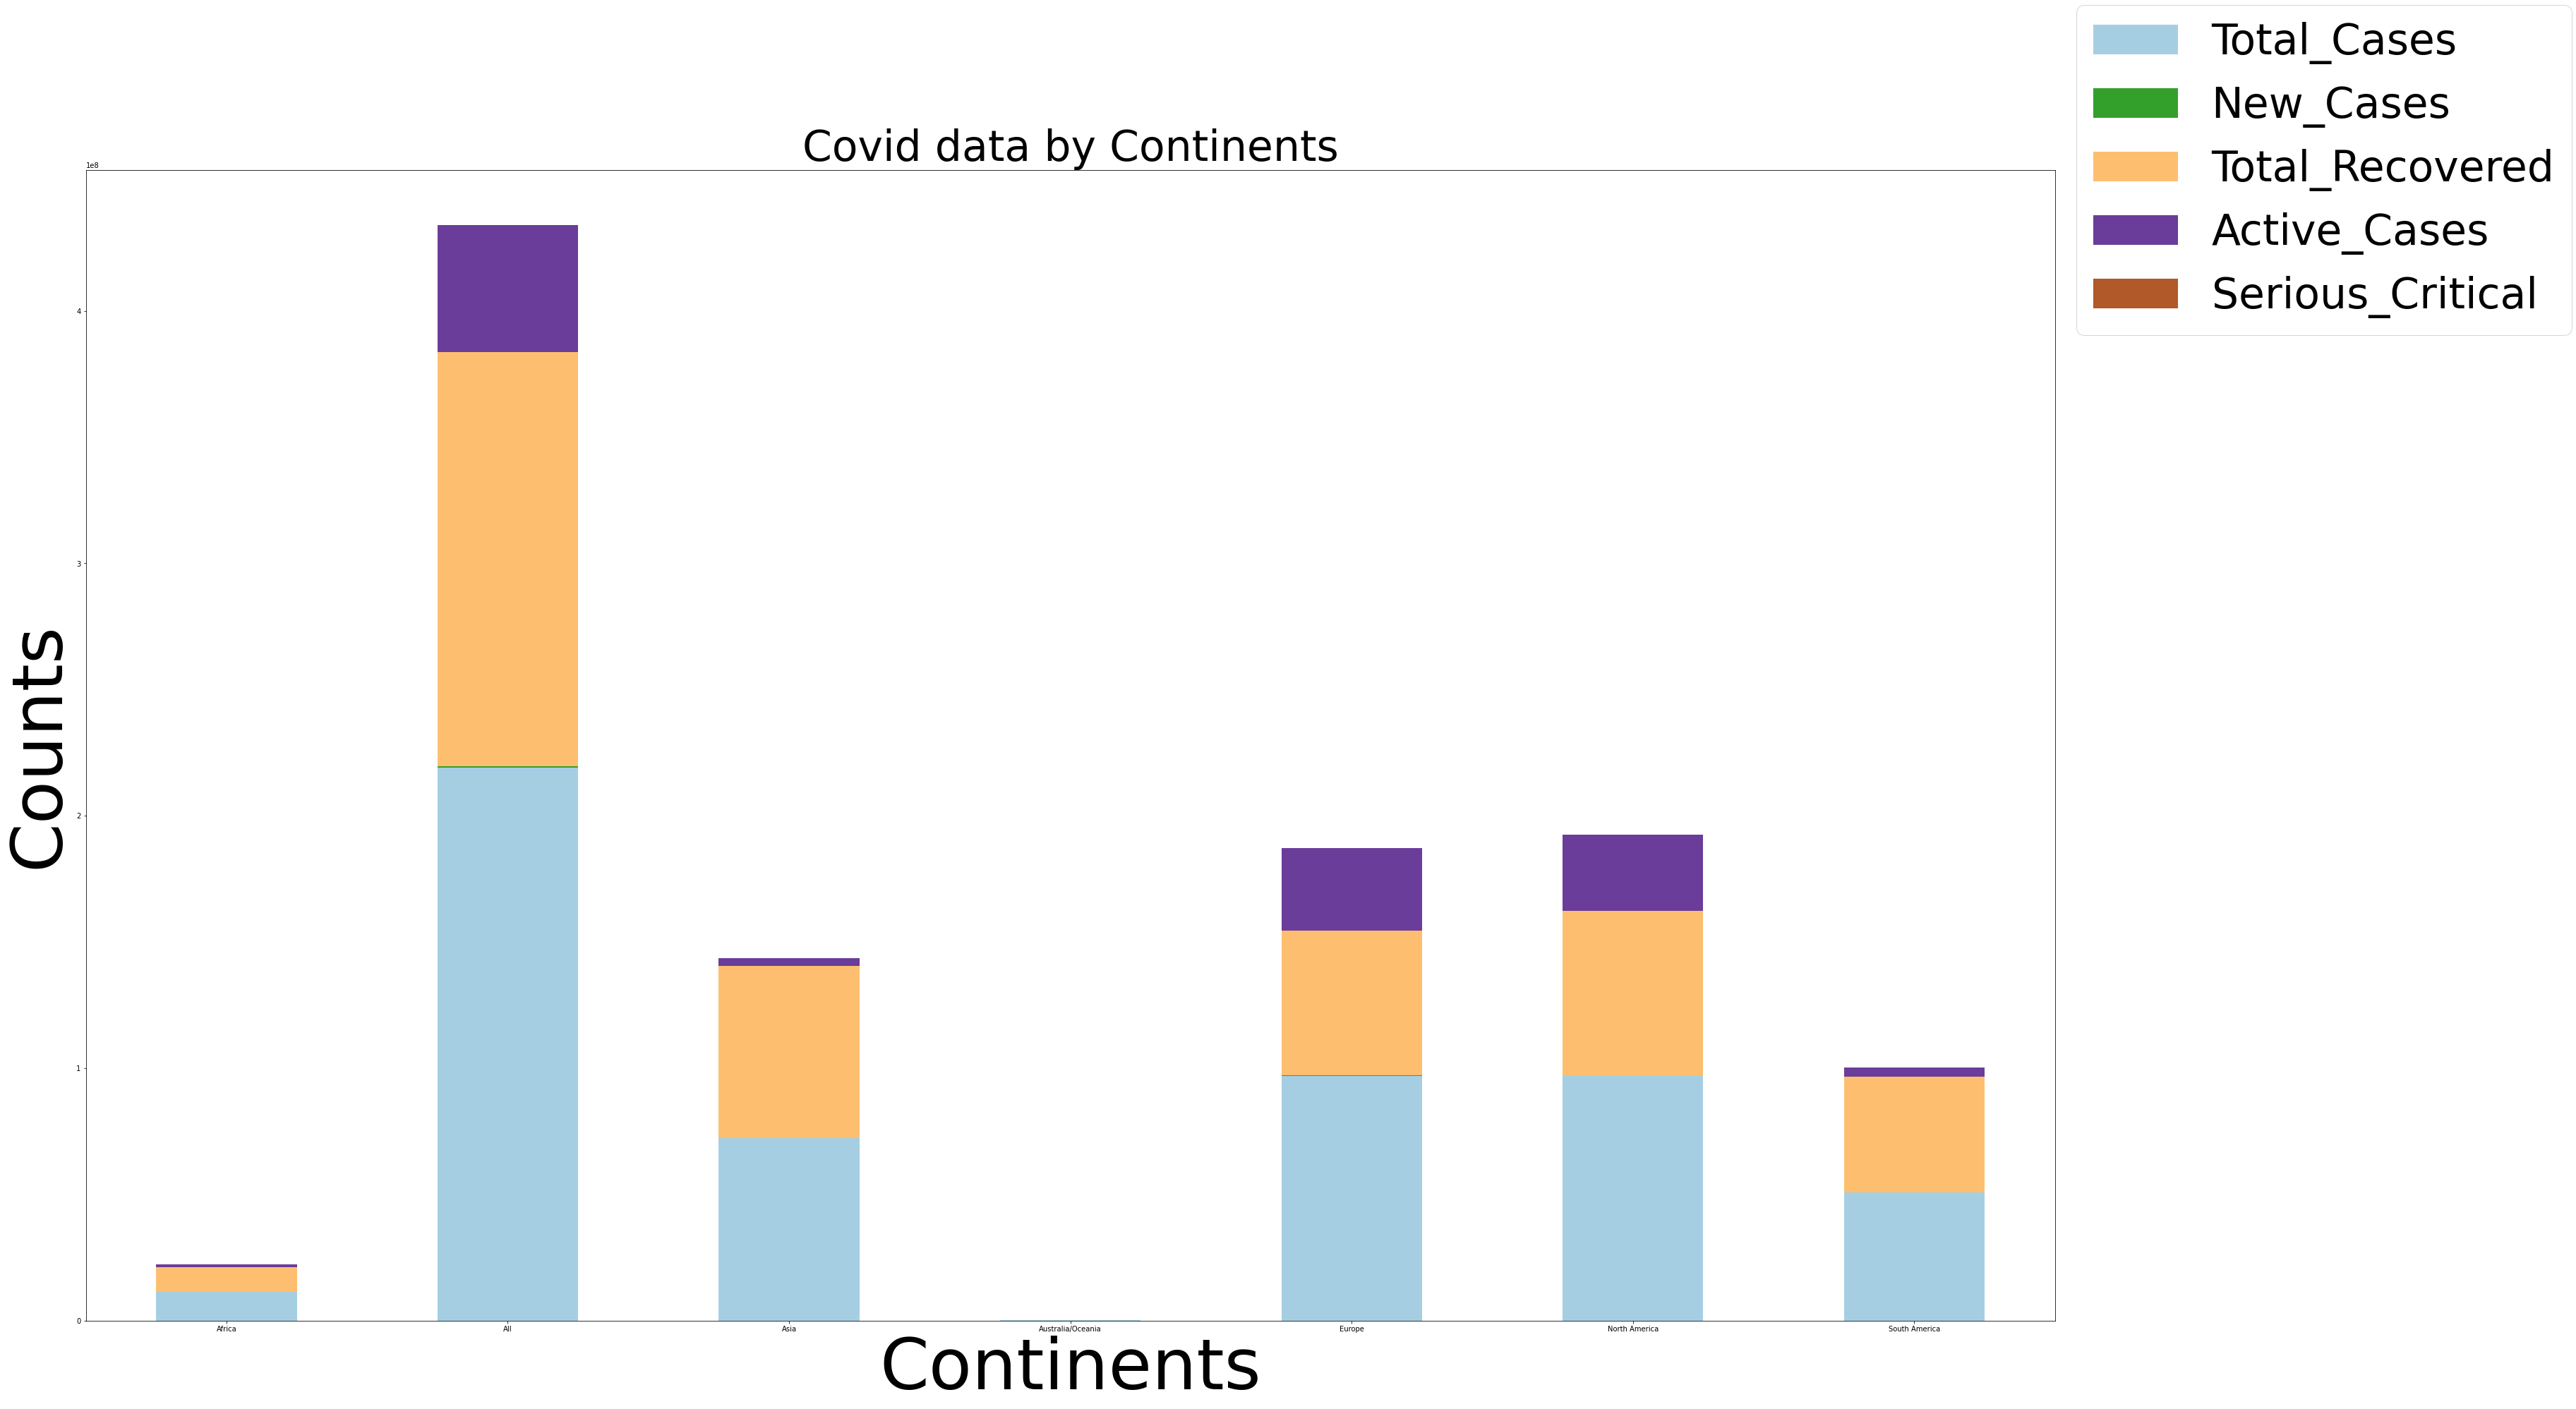

In [55]:
# Plotting the current numbers of COVID data

plt.rcParams['figure.figsize'] = (50, 30)

s = web_data.groupby(['Continent'])['Total_Cases', 'New_Cases', 'Total_Recovered', 'Active_Cases', 'Serious_Critical'].aggregate(np.sum)
ax = s.plot(kind='bar', stacked = True, colormap = 'Paired', rot = 0)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1), prop={'size': 60})
plt.title('Covid data by Continents', fontsize = 60)
plt.xlabel('Continents', fontsize = 100)
plt.ylabel('Counts', fontsize = 100)
plt.rcParams['xtick.labelsize']=100
plt.rcParams['ytick.labelsize']=50
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002575A9F4E50>]],
      dtype=object)

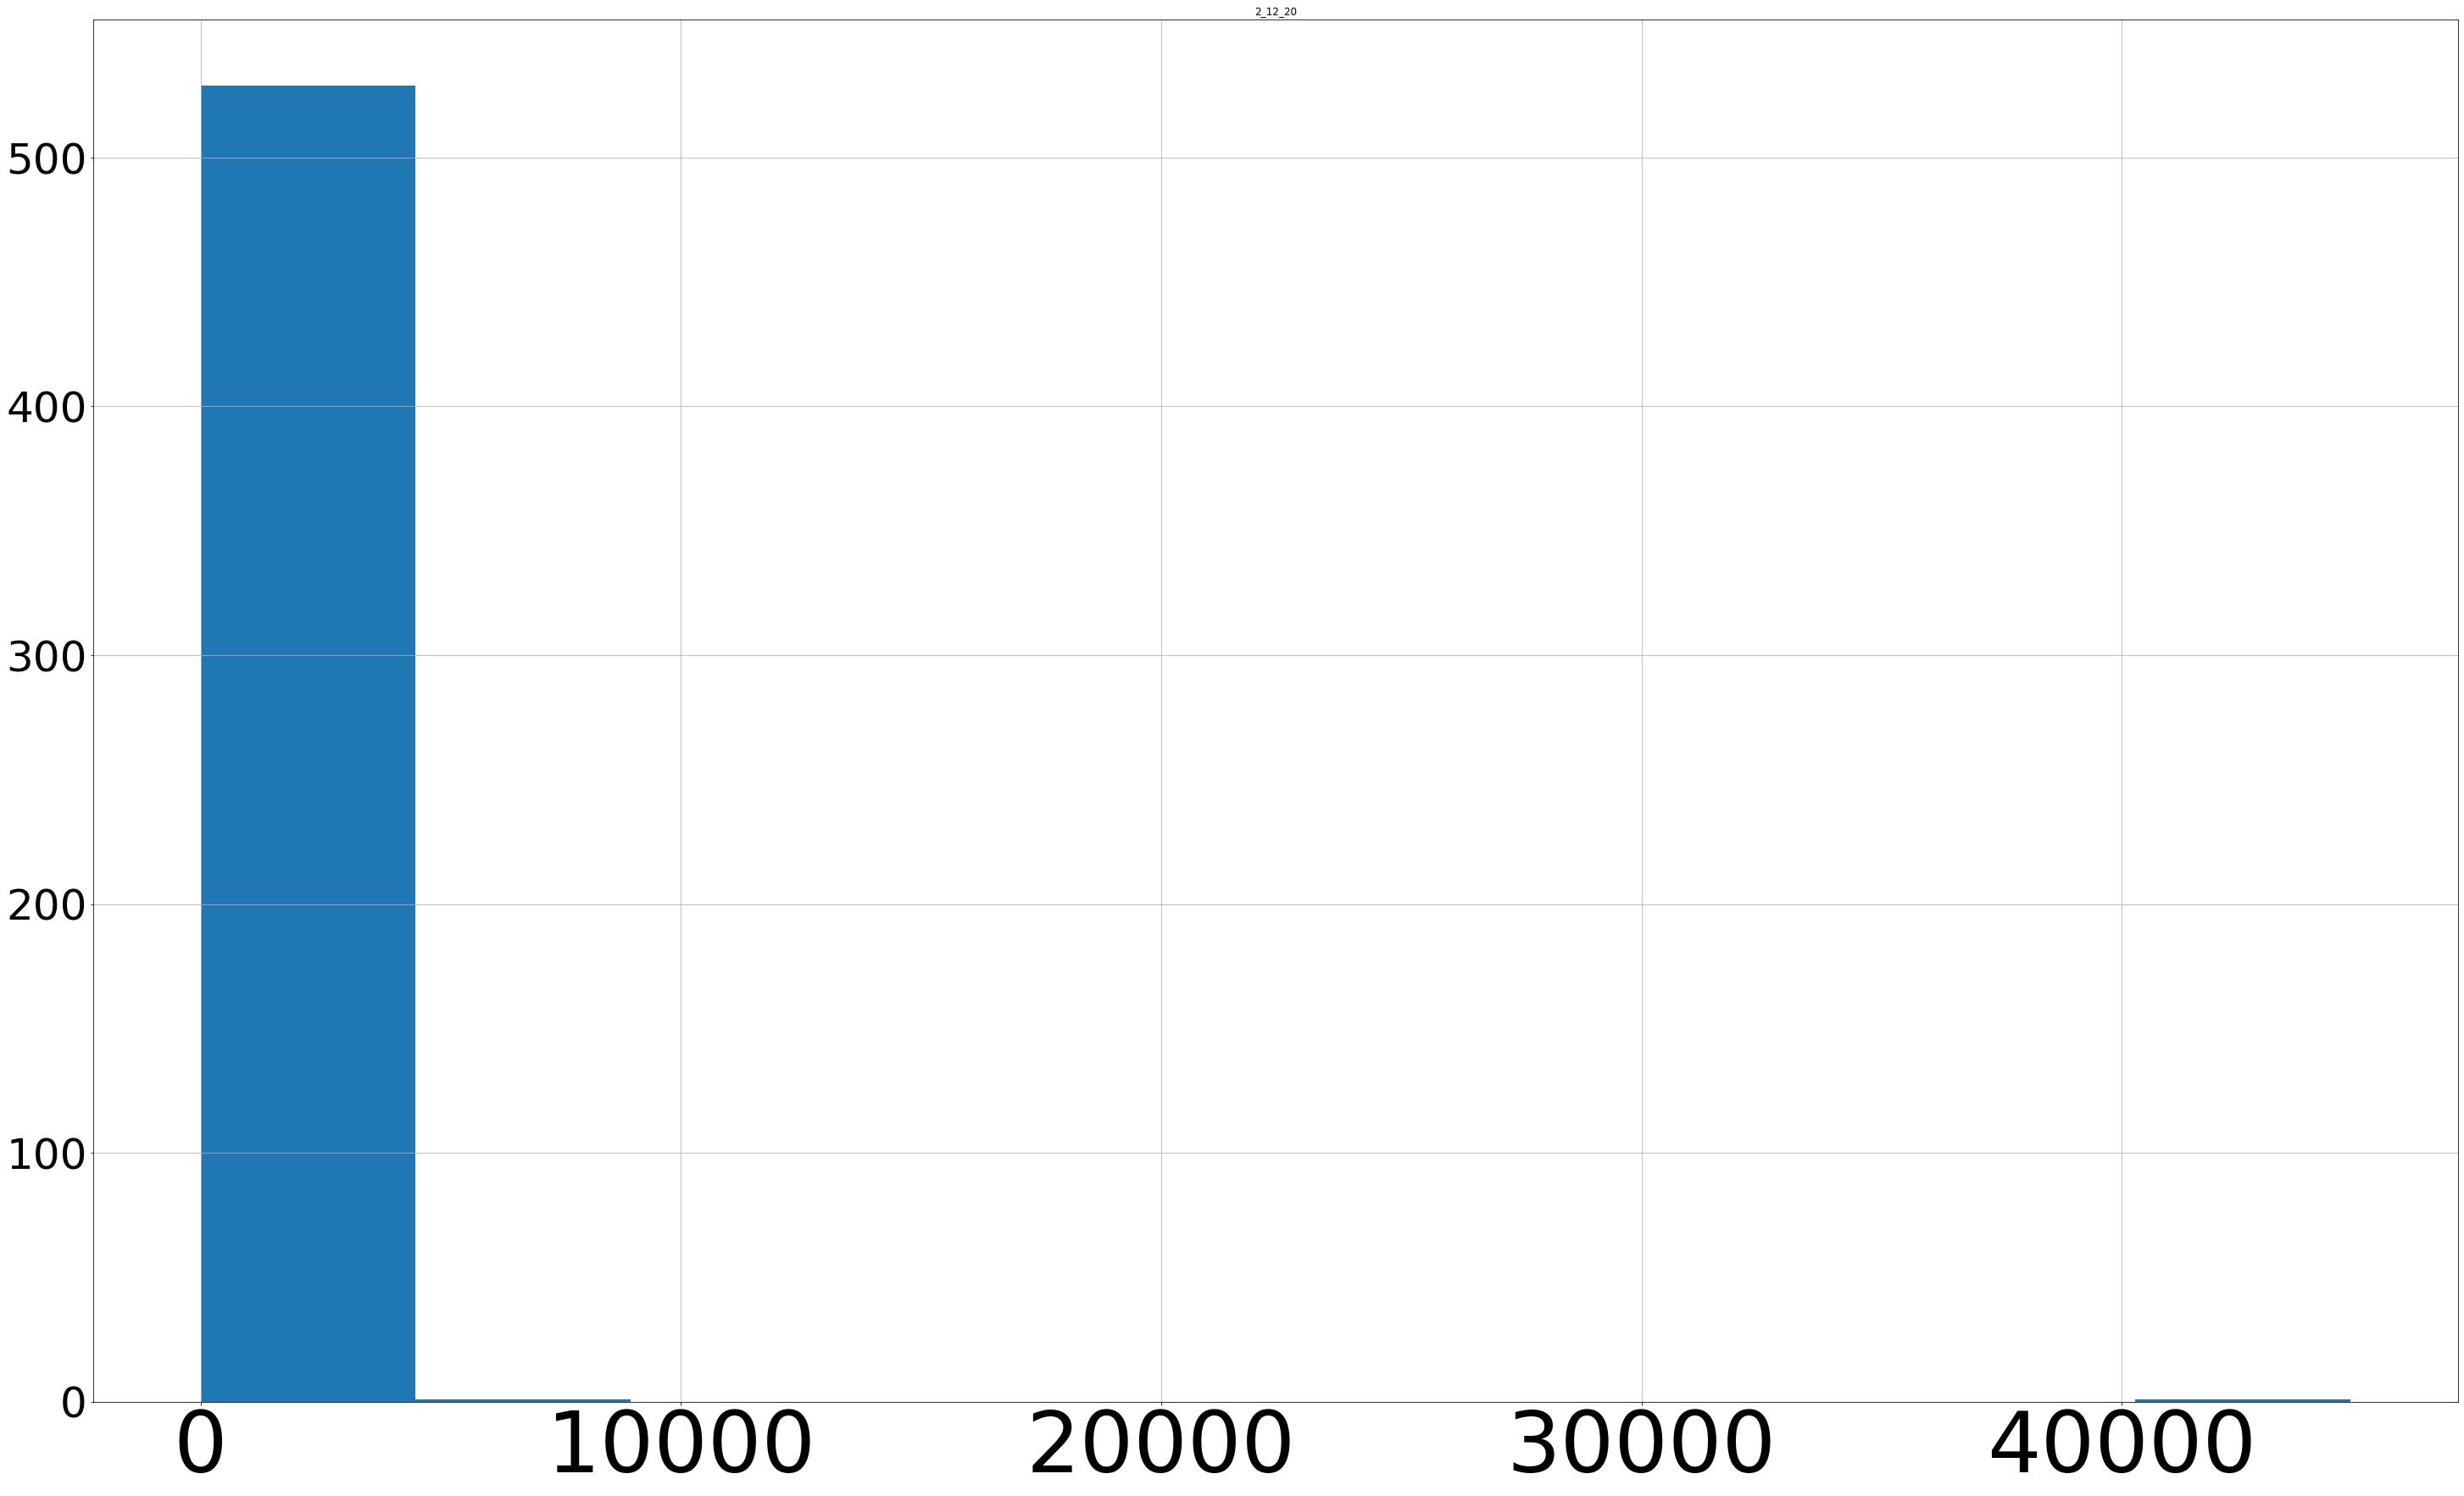

In [56]:
# A quick visualization of the frequency counts of COVID cases reported on January 22nd 2020
final.hist(column='2_12_20')

In [57]:
df2 = csv_data.drop(['COVID_status', 'Country'], axis=1)

In [58]:
df2 = csv_data.drop(['Unnamed: 0'], axis=1)

In [59]:
df3 = csv_data.drop(['COVID_status', 'Country'], axis=1)

In [60]:
df3

,Unnamed: 0,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21
0,0,0,0,0,0,0,0,0,0,0,...,55265,55330,55335,55359,55384,55402,55420,55445,55473,55492
1,1,0,0,0,0,0,0,0,0,0,...,83082,84212,85336,86289,87528,88671,89776,90835,91987,93075
2,2,0,0,0,0,0,0,0,0,0,...,108629,108629,109088,109313,109559,109782,110049,110303,110513,110711
3,3,0,0,0,0,0,0,0,0,0,...,10172,10206,10251,10275,10312,10352,10391,10427,10463,10503
4,4,0,0,0,0,0,0,0,0,0,...,20030,20062,20086,20112,20163,20210,20261,20294,20329,20366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,571,0,0,0,0,0,0,0,0,0,...,1465,1468,1472,1472,1472,1480,1528,1529,1529,1532
572,572,0,0,0,0,0,0,0,0,0,...,151690,152120,152579,153019,153682,154260,154727,155362,155950,156472
573,573,0,0,0,0,0,0,0,0,0,...,1427,1428,1428,1428,1428,1428,1428,1430,1430,1430
574,574,0,0,0,0,0,0,0,0,0,...,52045,53410,54835,56329,58319,58875,59989,61302,62575,62870


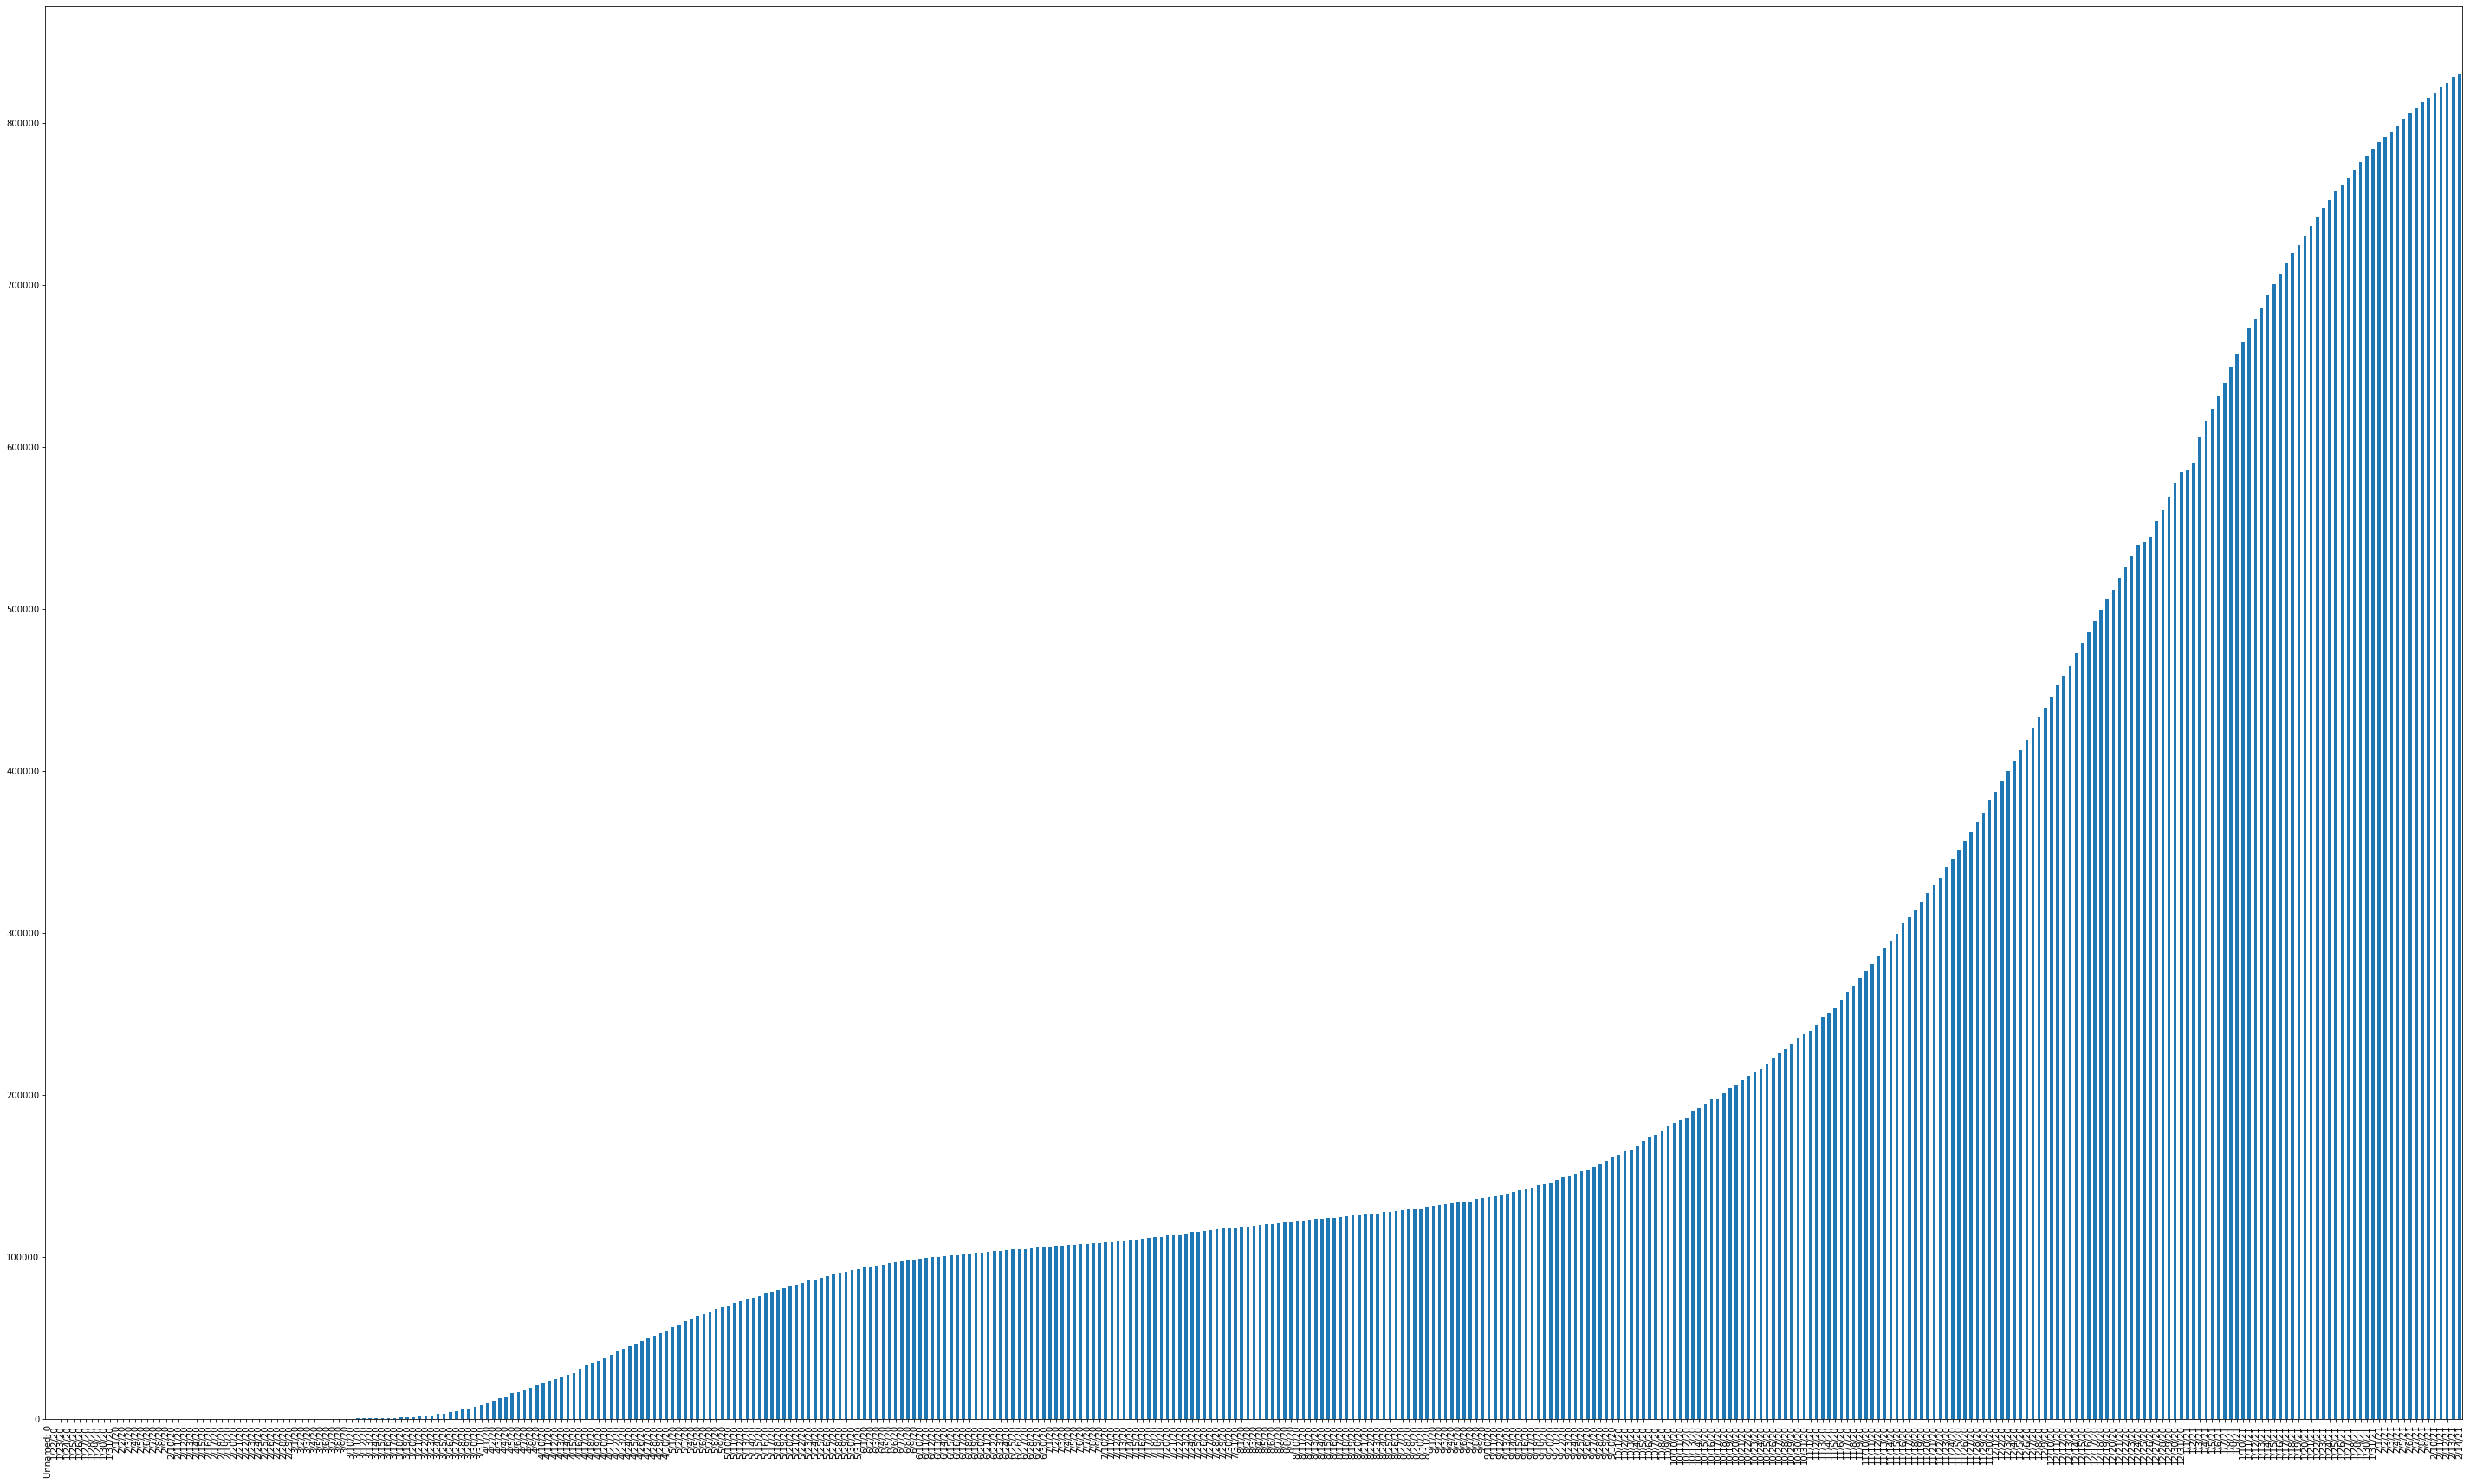

In [63]:
# Confirmed cases in China 
# Number of cases in China started increasing from end of January 

df3.T[32].plot.bar()
#plt.ylabel('Counts', fontsize = 10)
plt.rcParams['xtick.labelsize']=5
plt.rcParams['ytick.labelsize']=10
plt.show()

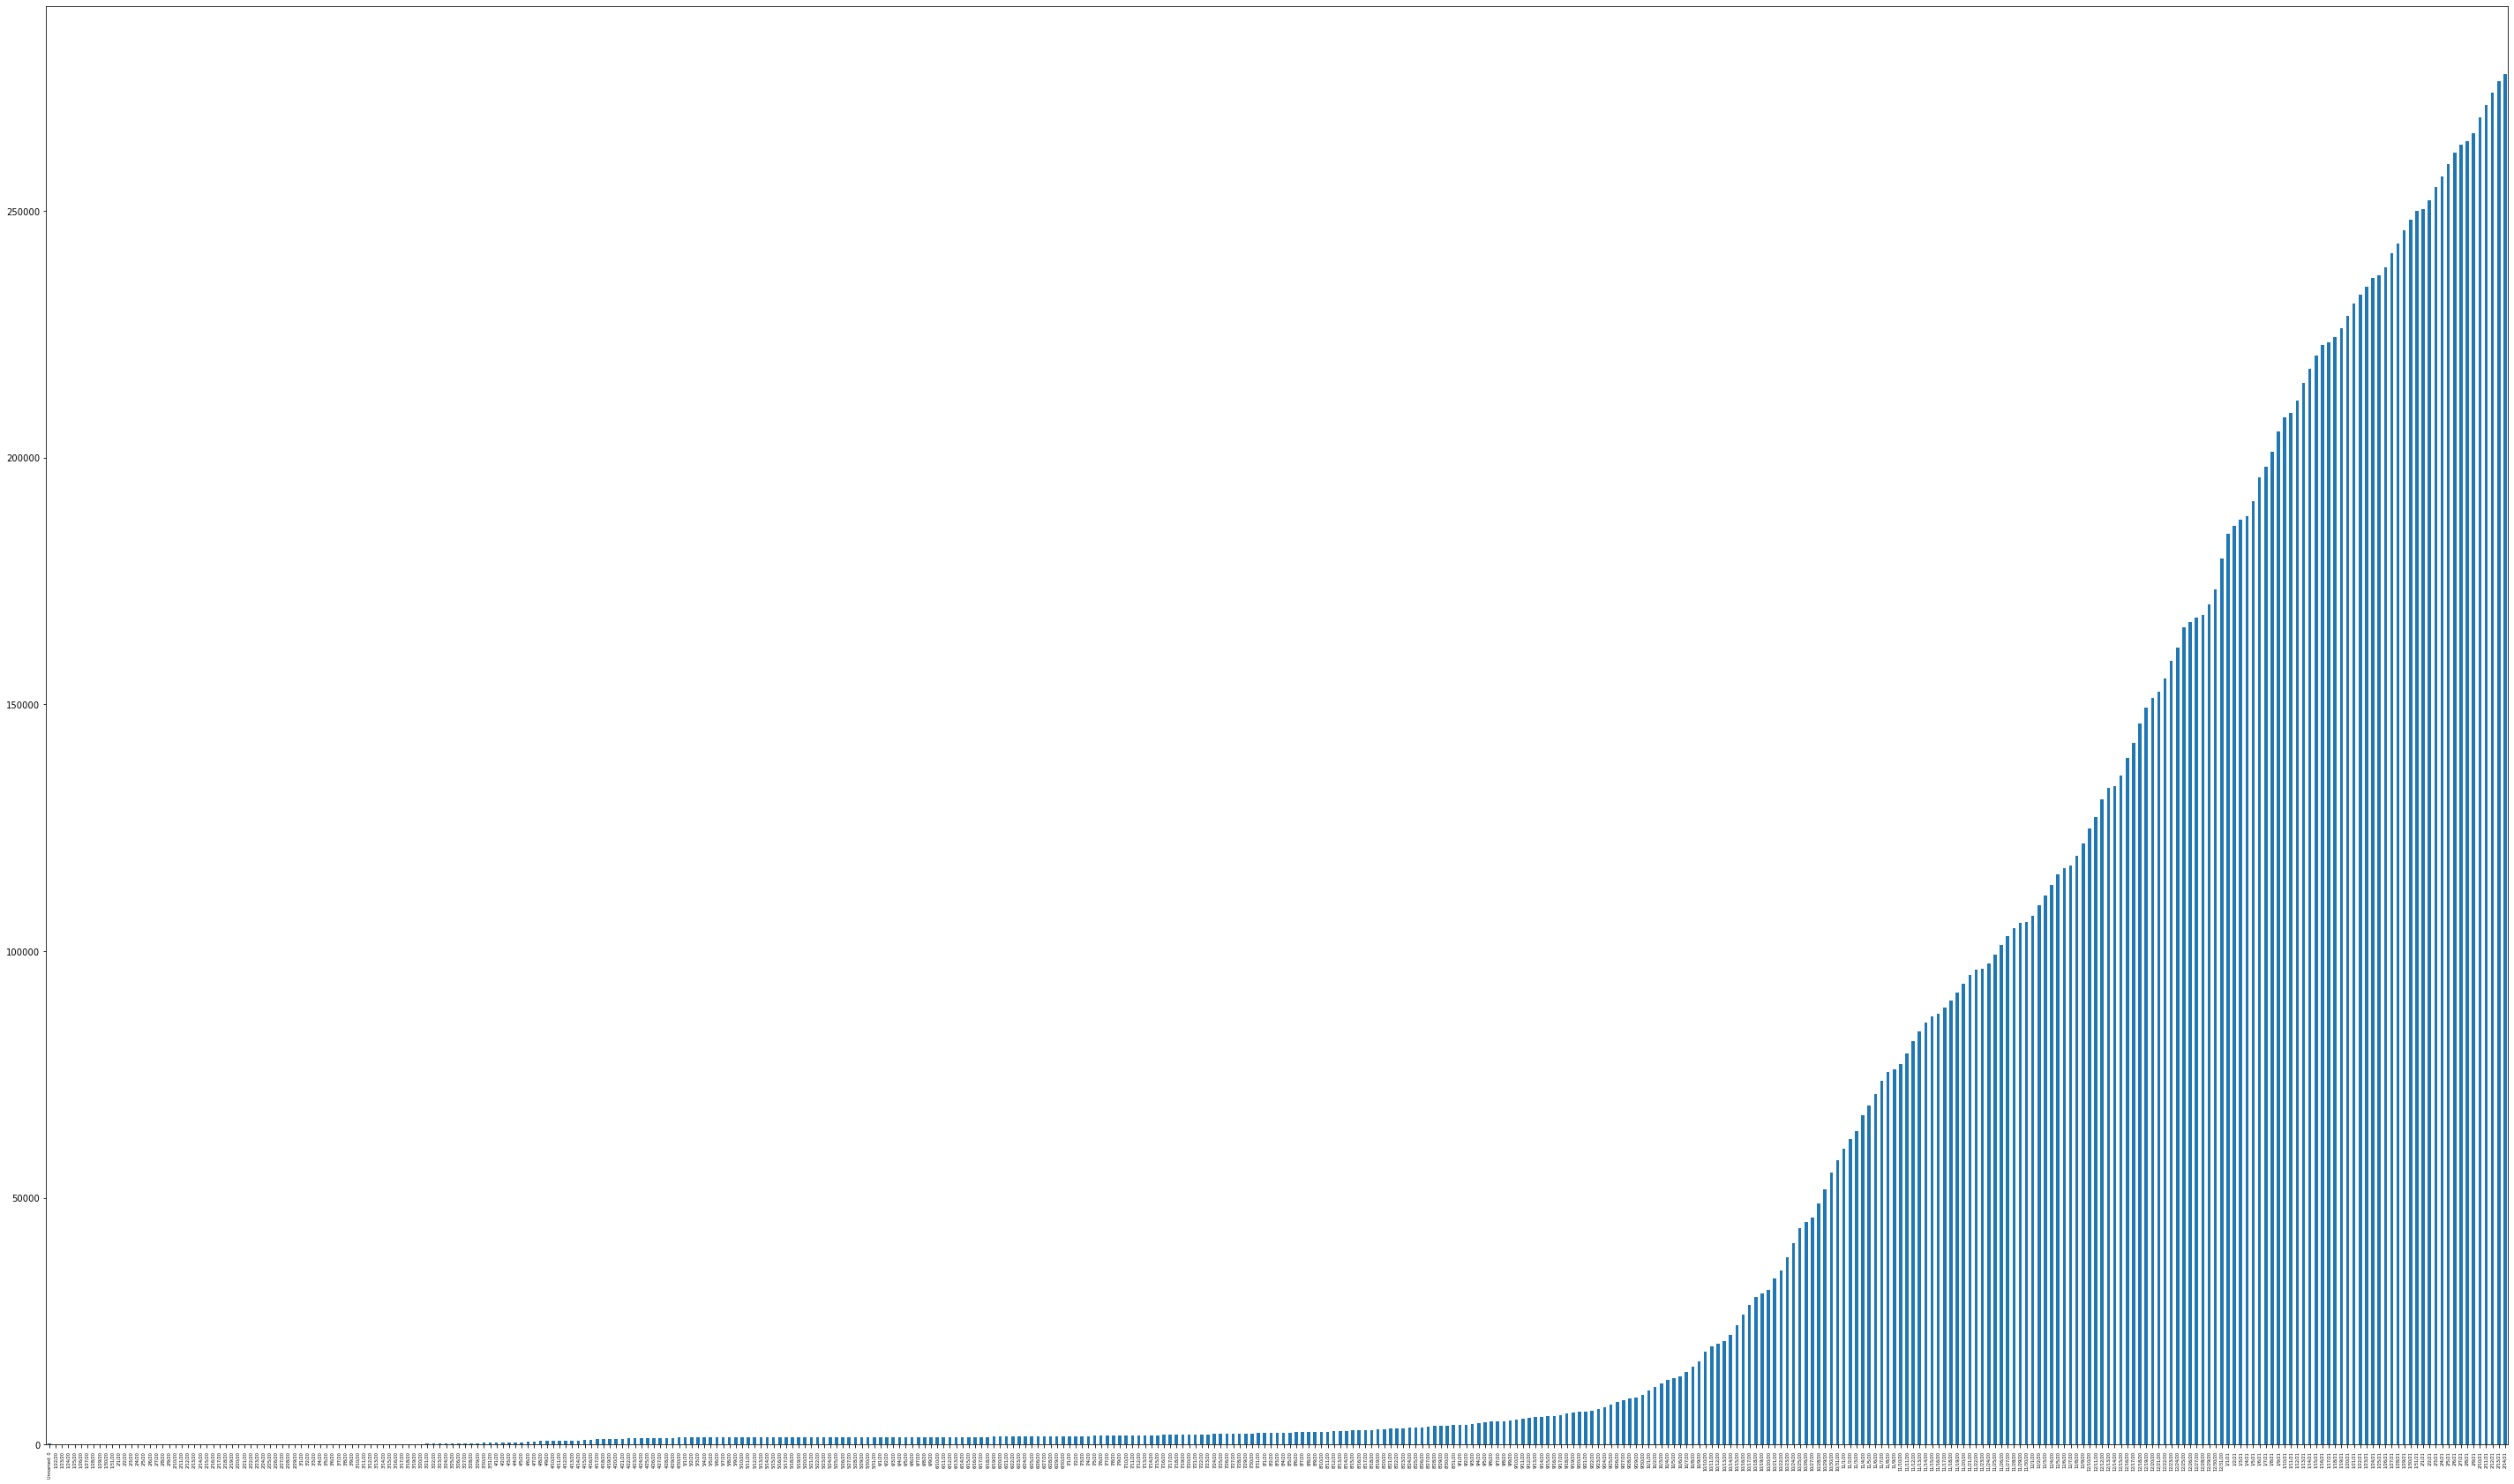

In [64]:
# Confirmed cases in US 
# Number of cases in US started increasing from mid of march 



df3.T[156].plot.bar()

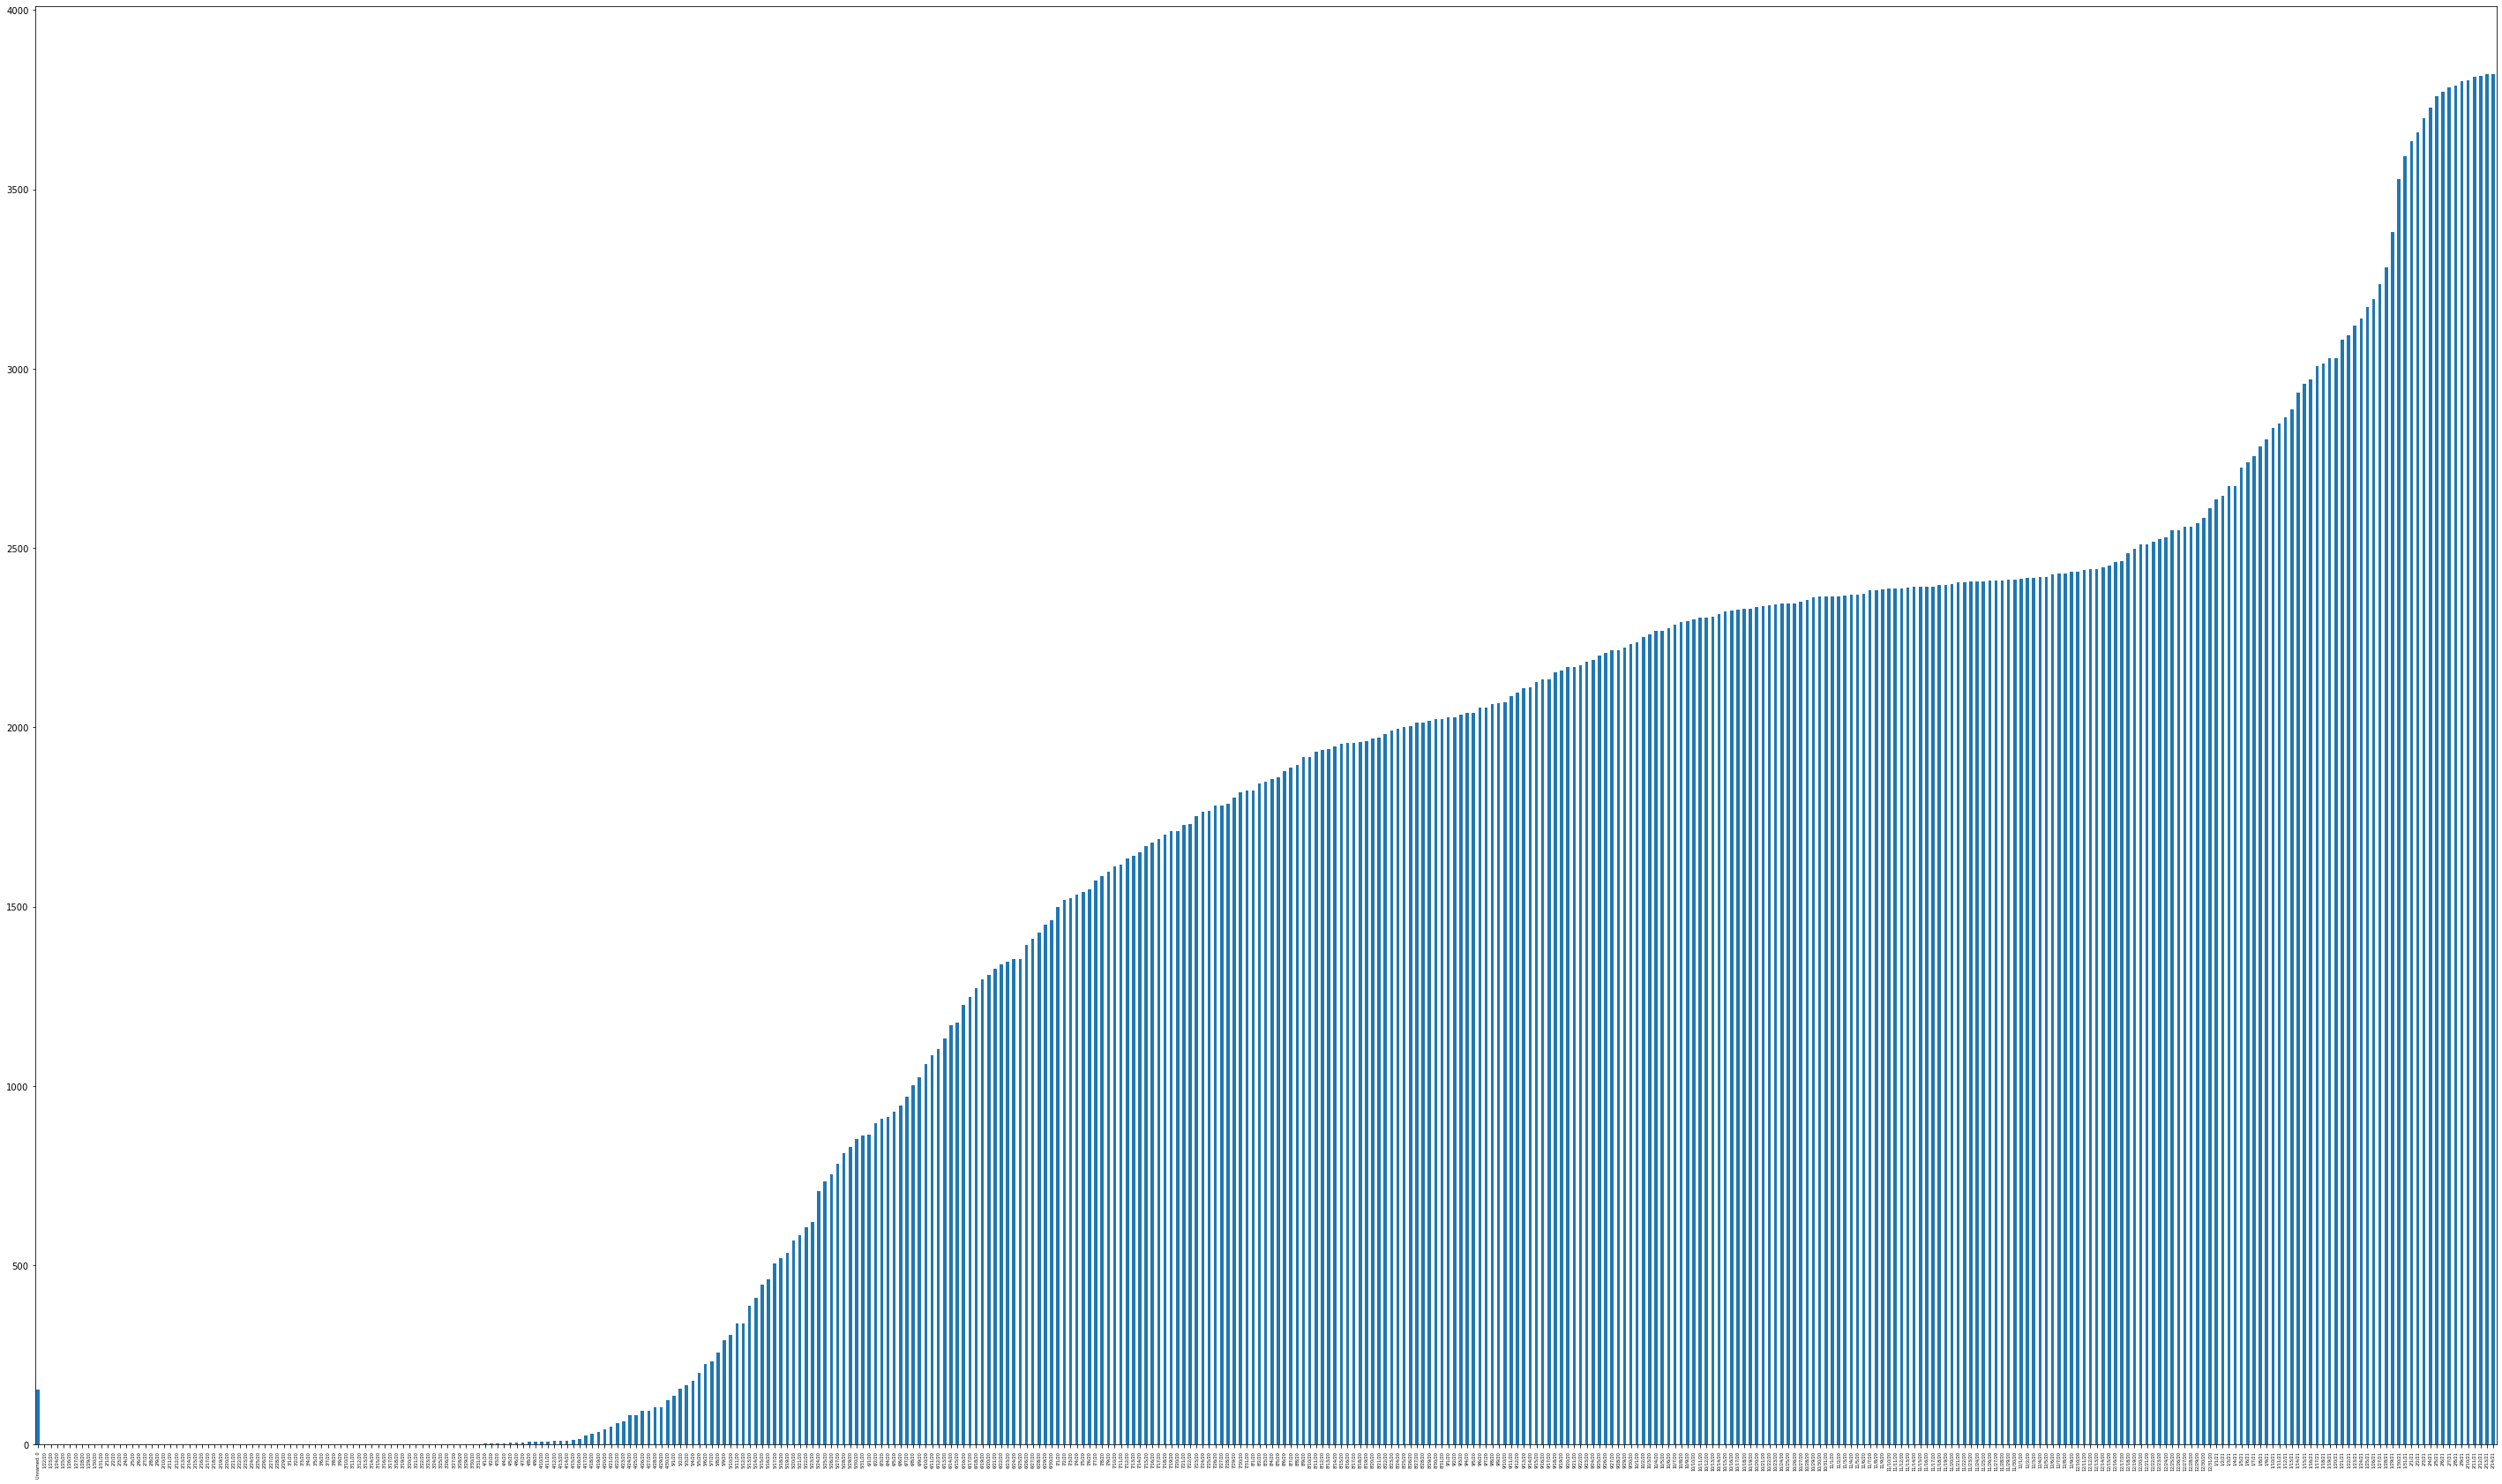

In [65]:
# Confirmed cases in UK
# Similar to the US, number of cases in UK also started increasing from mid of march 



df3.T[154].plot.bar()

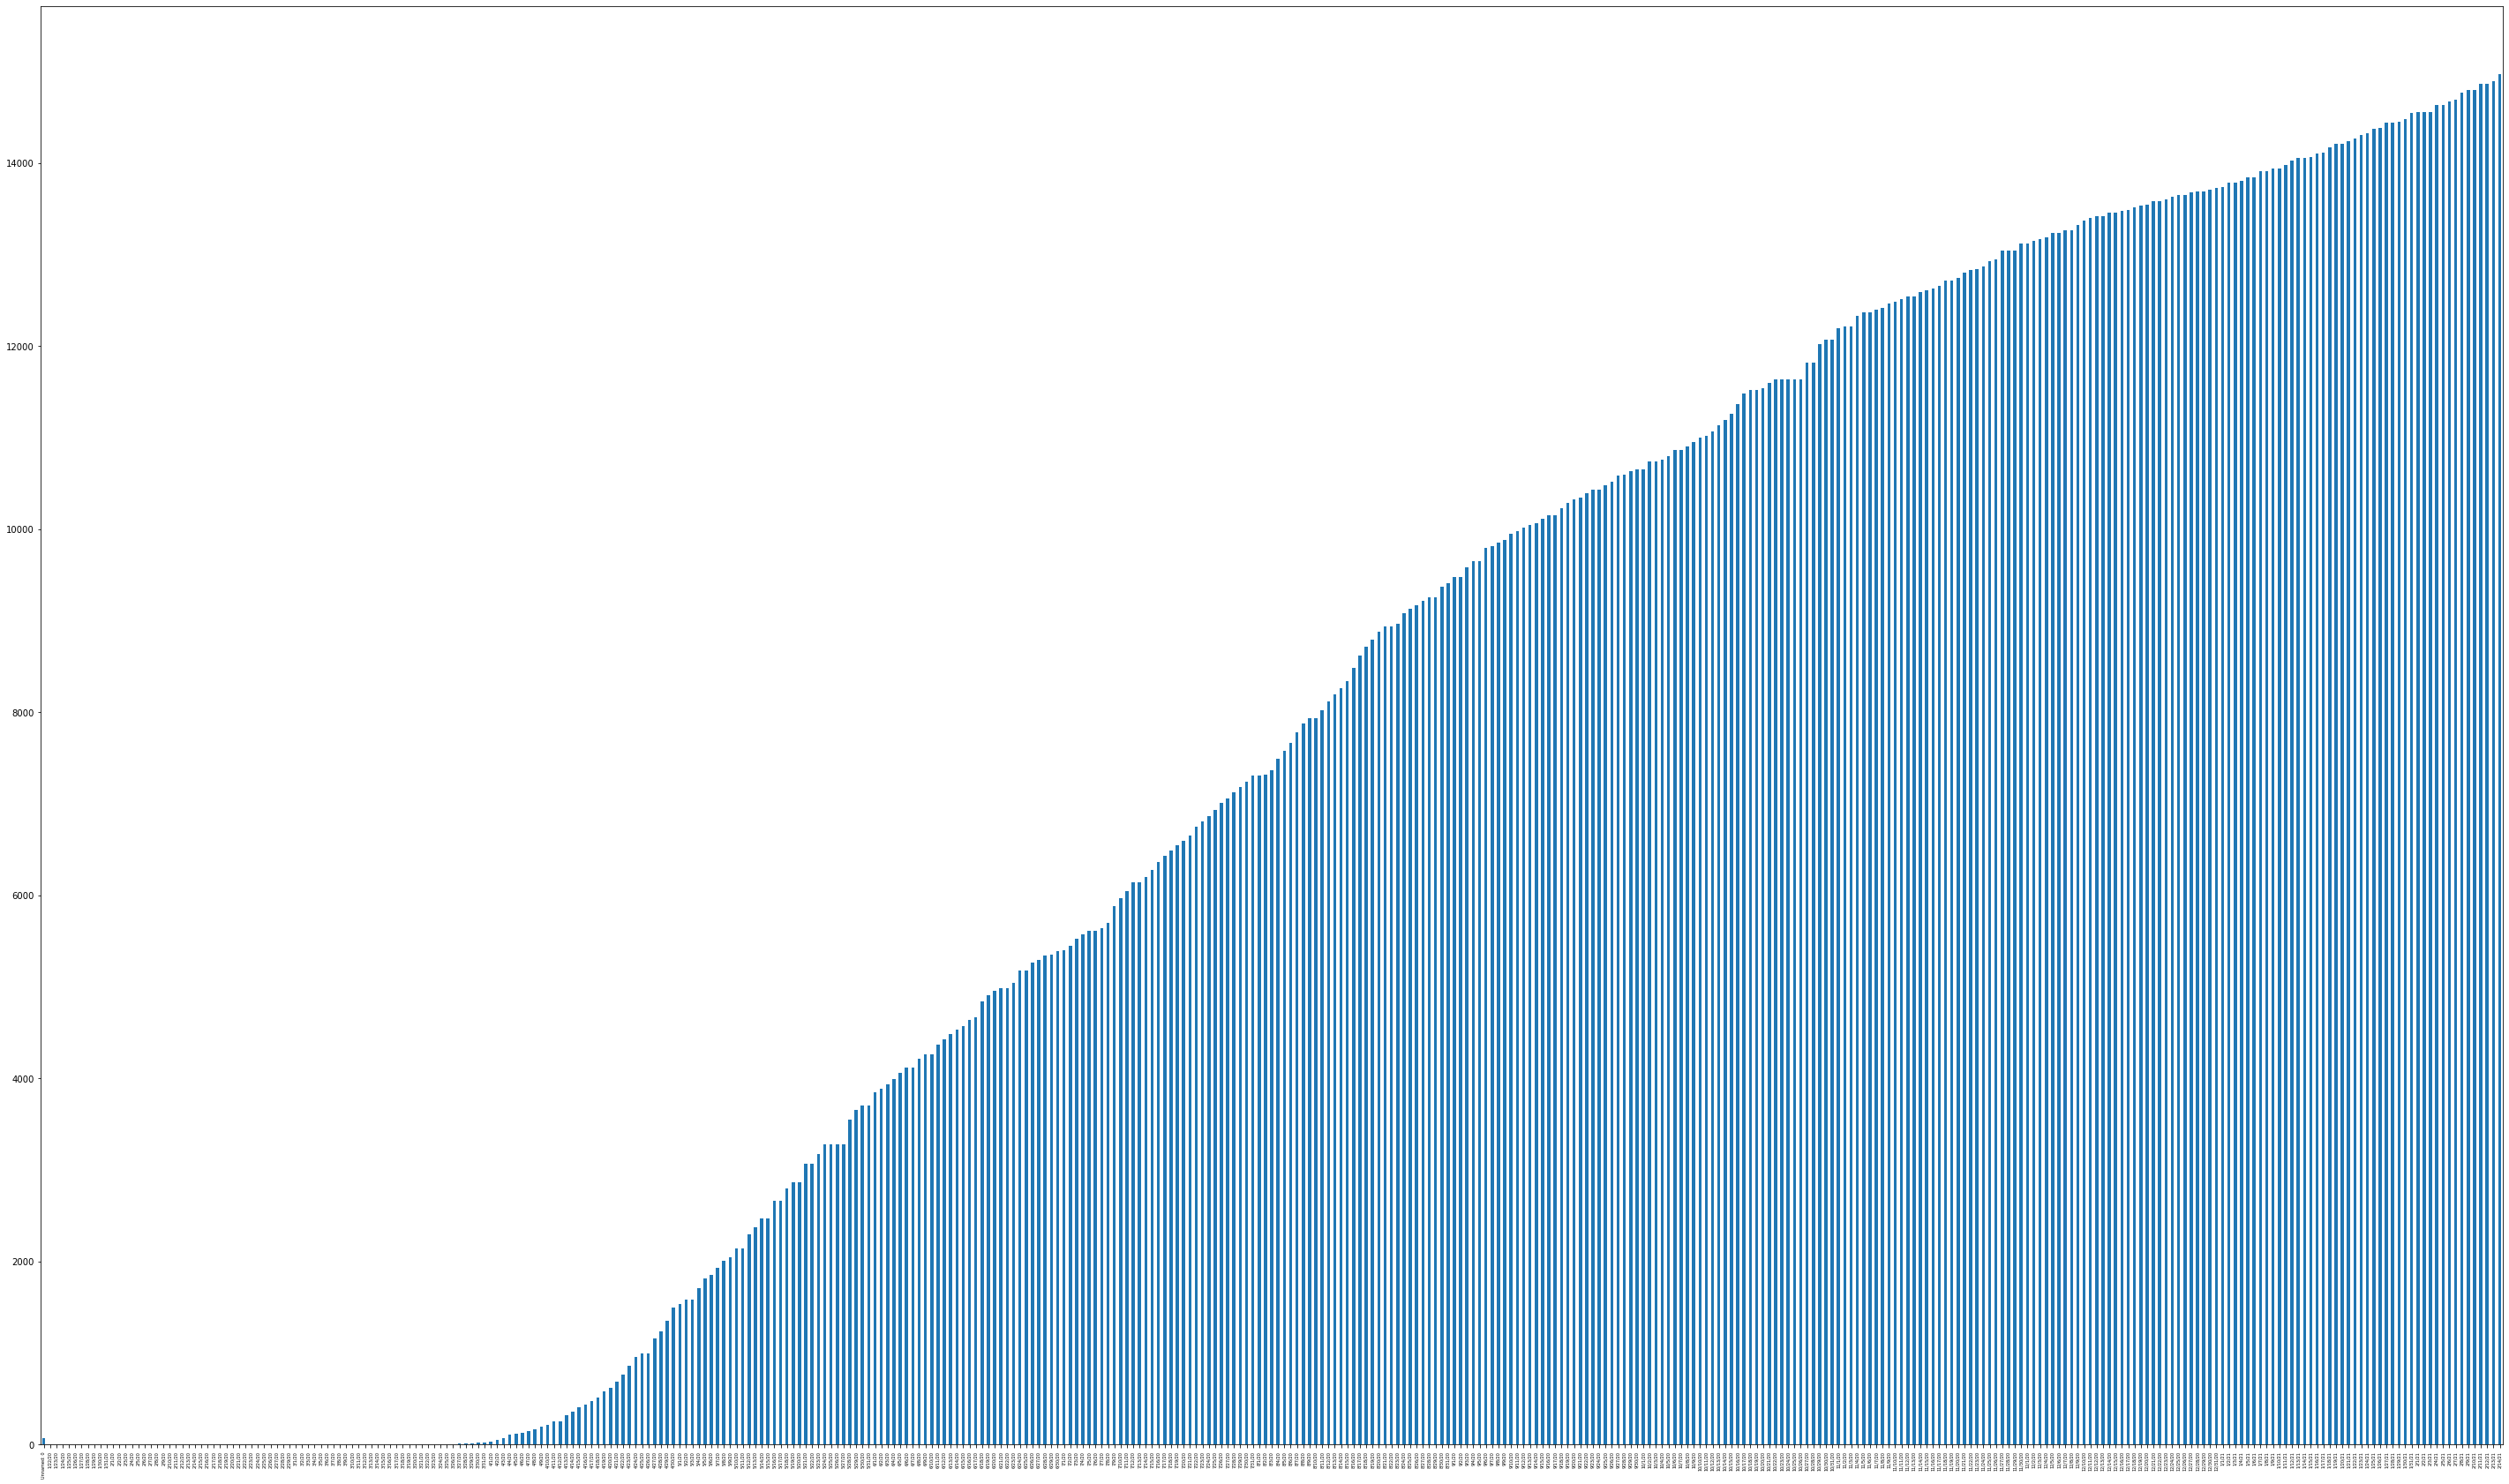

In [66]:
# Confirmed cases in India
# Number of cases in India started increasing from early April



df3.T[71].plot.bar()

In [74]:
api_data

,Unnamed:,1/1/2021,1/4/2021,1/5/2021,1/6/2021,1/7/2021,1/8/2021,1/11/2021,1/12/2021,1/13/2021,...,12/18/,12/21/,12/22/,12/23/,12/24/,12/28/,12/29/,12/30/,12/31/,Index/Name
1,1,0,14376.7002,14536.53027,14788.83984,14928.75,14966.83008,14937.95996,15010.29004,14983.61035,...,14467.82031,14378.84961,14321.33984,14398.62012,14382.5,14405.76953,14397.91992,14477.48047,14524.79981,NYA
3,3,0,30223.89063,30391.59961,30829.40039,31041.13086,31097.9707,31008.68945,31068.68945,31060.4707,...,30179.05078,30216.44922,30015.50977,30129.83008,30199.86914,30403.9707,30335.66992,30409.56055,30606.48047,DJI
5,5,0,30223.89063,656.880005,682.570007,684.419983,683.409973,677.090027,672.27002,671.799988,...,649.140015,638.590027,642.429993,646.650024,30199.86914,30403.9707,658.099976,652.669983,30606.48047,BUK100P
7,7,47868.98047,48176.80078,48437.78125,48174.05859,48093.32031,48782.51172,49269.32031,49517.10938,49492.32031,...,46960.69141,45553.96094,46006.69141,46444.17969,46973.53906,47353.75,47613.07813,47746.21875,47751.32813,BSESN


In [77]:
api_data.columns = api_data.columns.str.replace("/", "_")

In [78]:
api_data.dtypes

Unnamed:       int64
1_1_2021      object
1_4_2021      object
1_5_2021      object
1_6_2021      object
               ...  
12_28_        object
12_29_        object
12_30_        object
12_31_        object
Index_Name    object
Length: 102, dtype: object

In [70]:
api_data.shape

(4, 102)

In [80]:
api_data = api_data.loc[:,api_data.columns != 'Index_Name'].astype(float).astype(int)

In [81]:
api_data.dtypes

Unnamed:     int32
1_1_2021     int32
1_4_2021     int32
1_5_2021     int32
1_6_2021     int32
             ...  
12_24_       int32
12_28_       int32
12_29_       int32
12_30_       int32
12_31_       int32
Length: 101, dtype: object

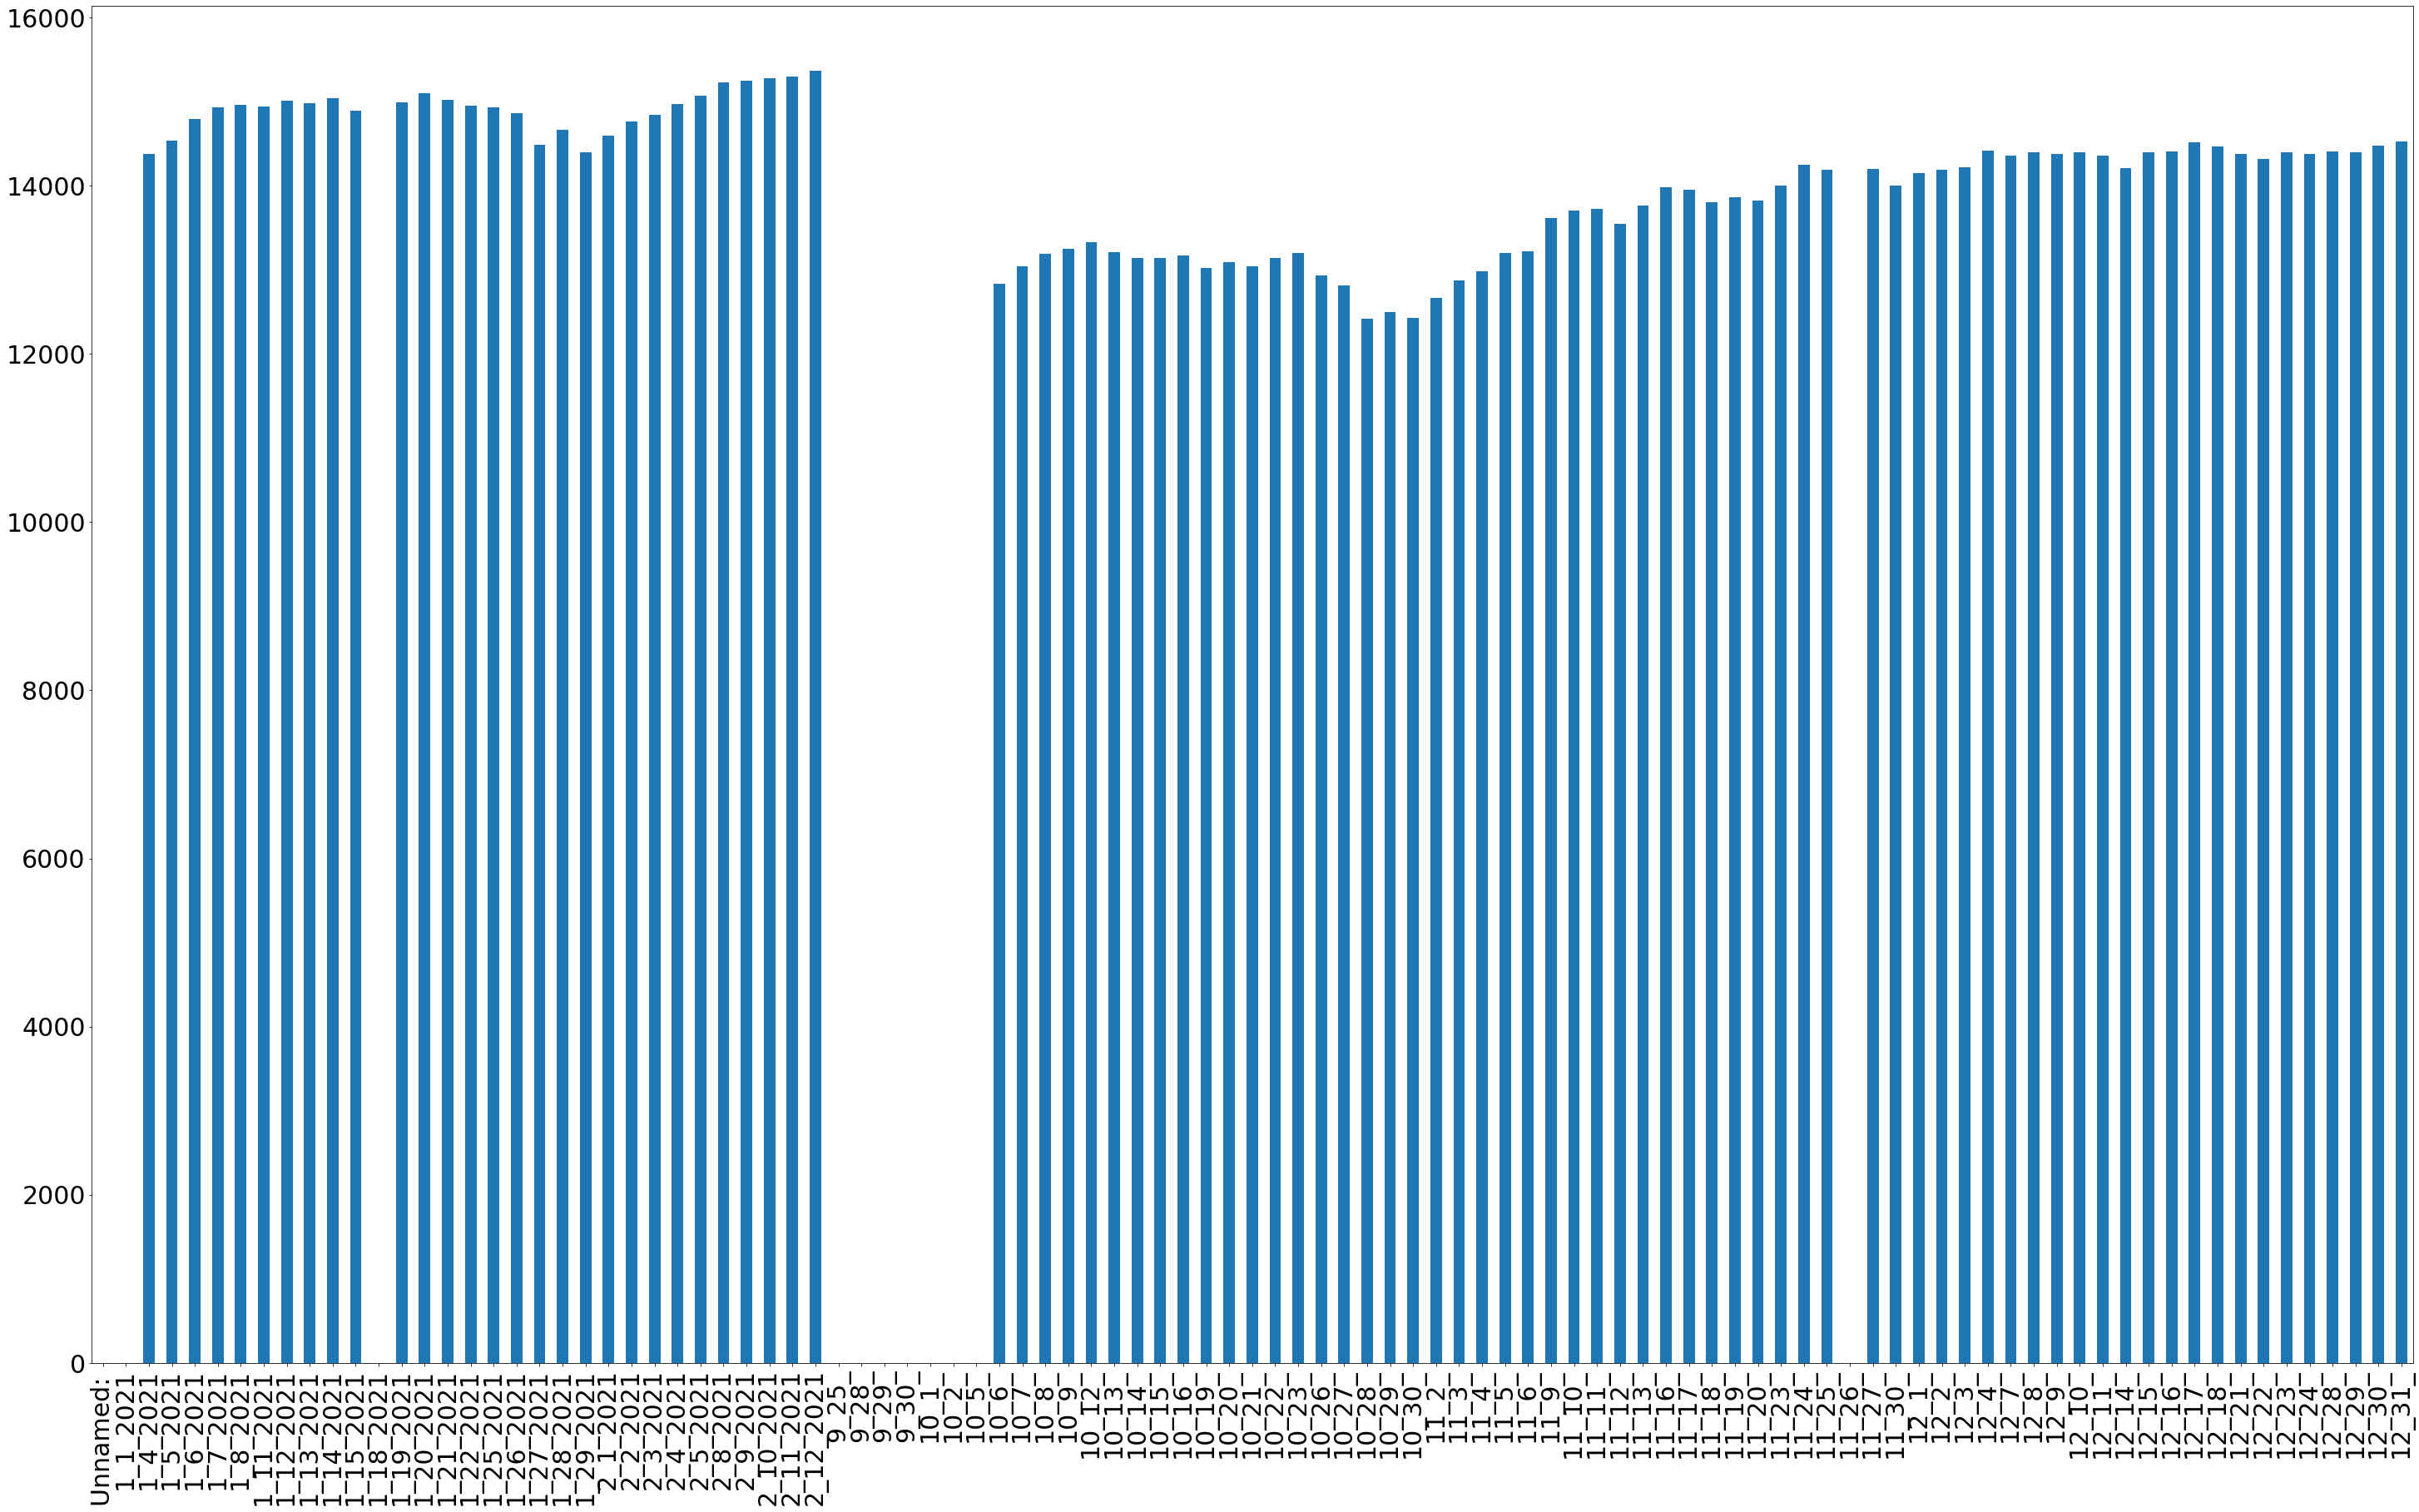

In [85]:
# Plotting a bar graph for the stock trends of NYSE Composite index. 
  
# The index is showing increase currently as covid cases are dropping, when COVID are in peak during october, 2020, index showed lower trend

api_data.T[1].plot.bar()
#plt.ylabel('Counts', fontsize = 10)
plt.rcParams['xtick.labelsize']=30
plt.rcParams['ytick.labelsize']=30
plt.show()

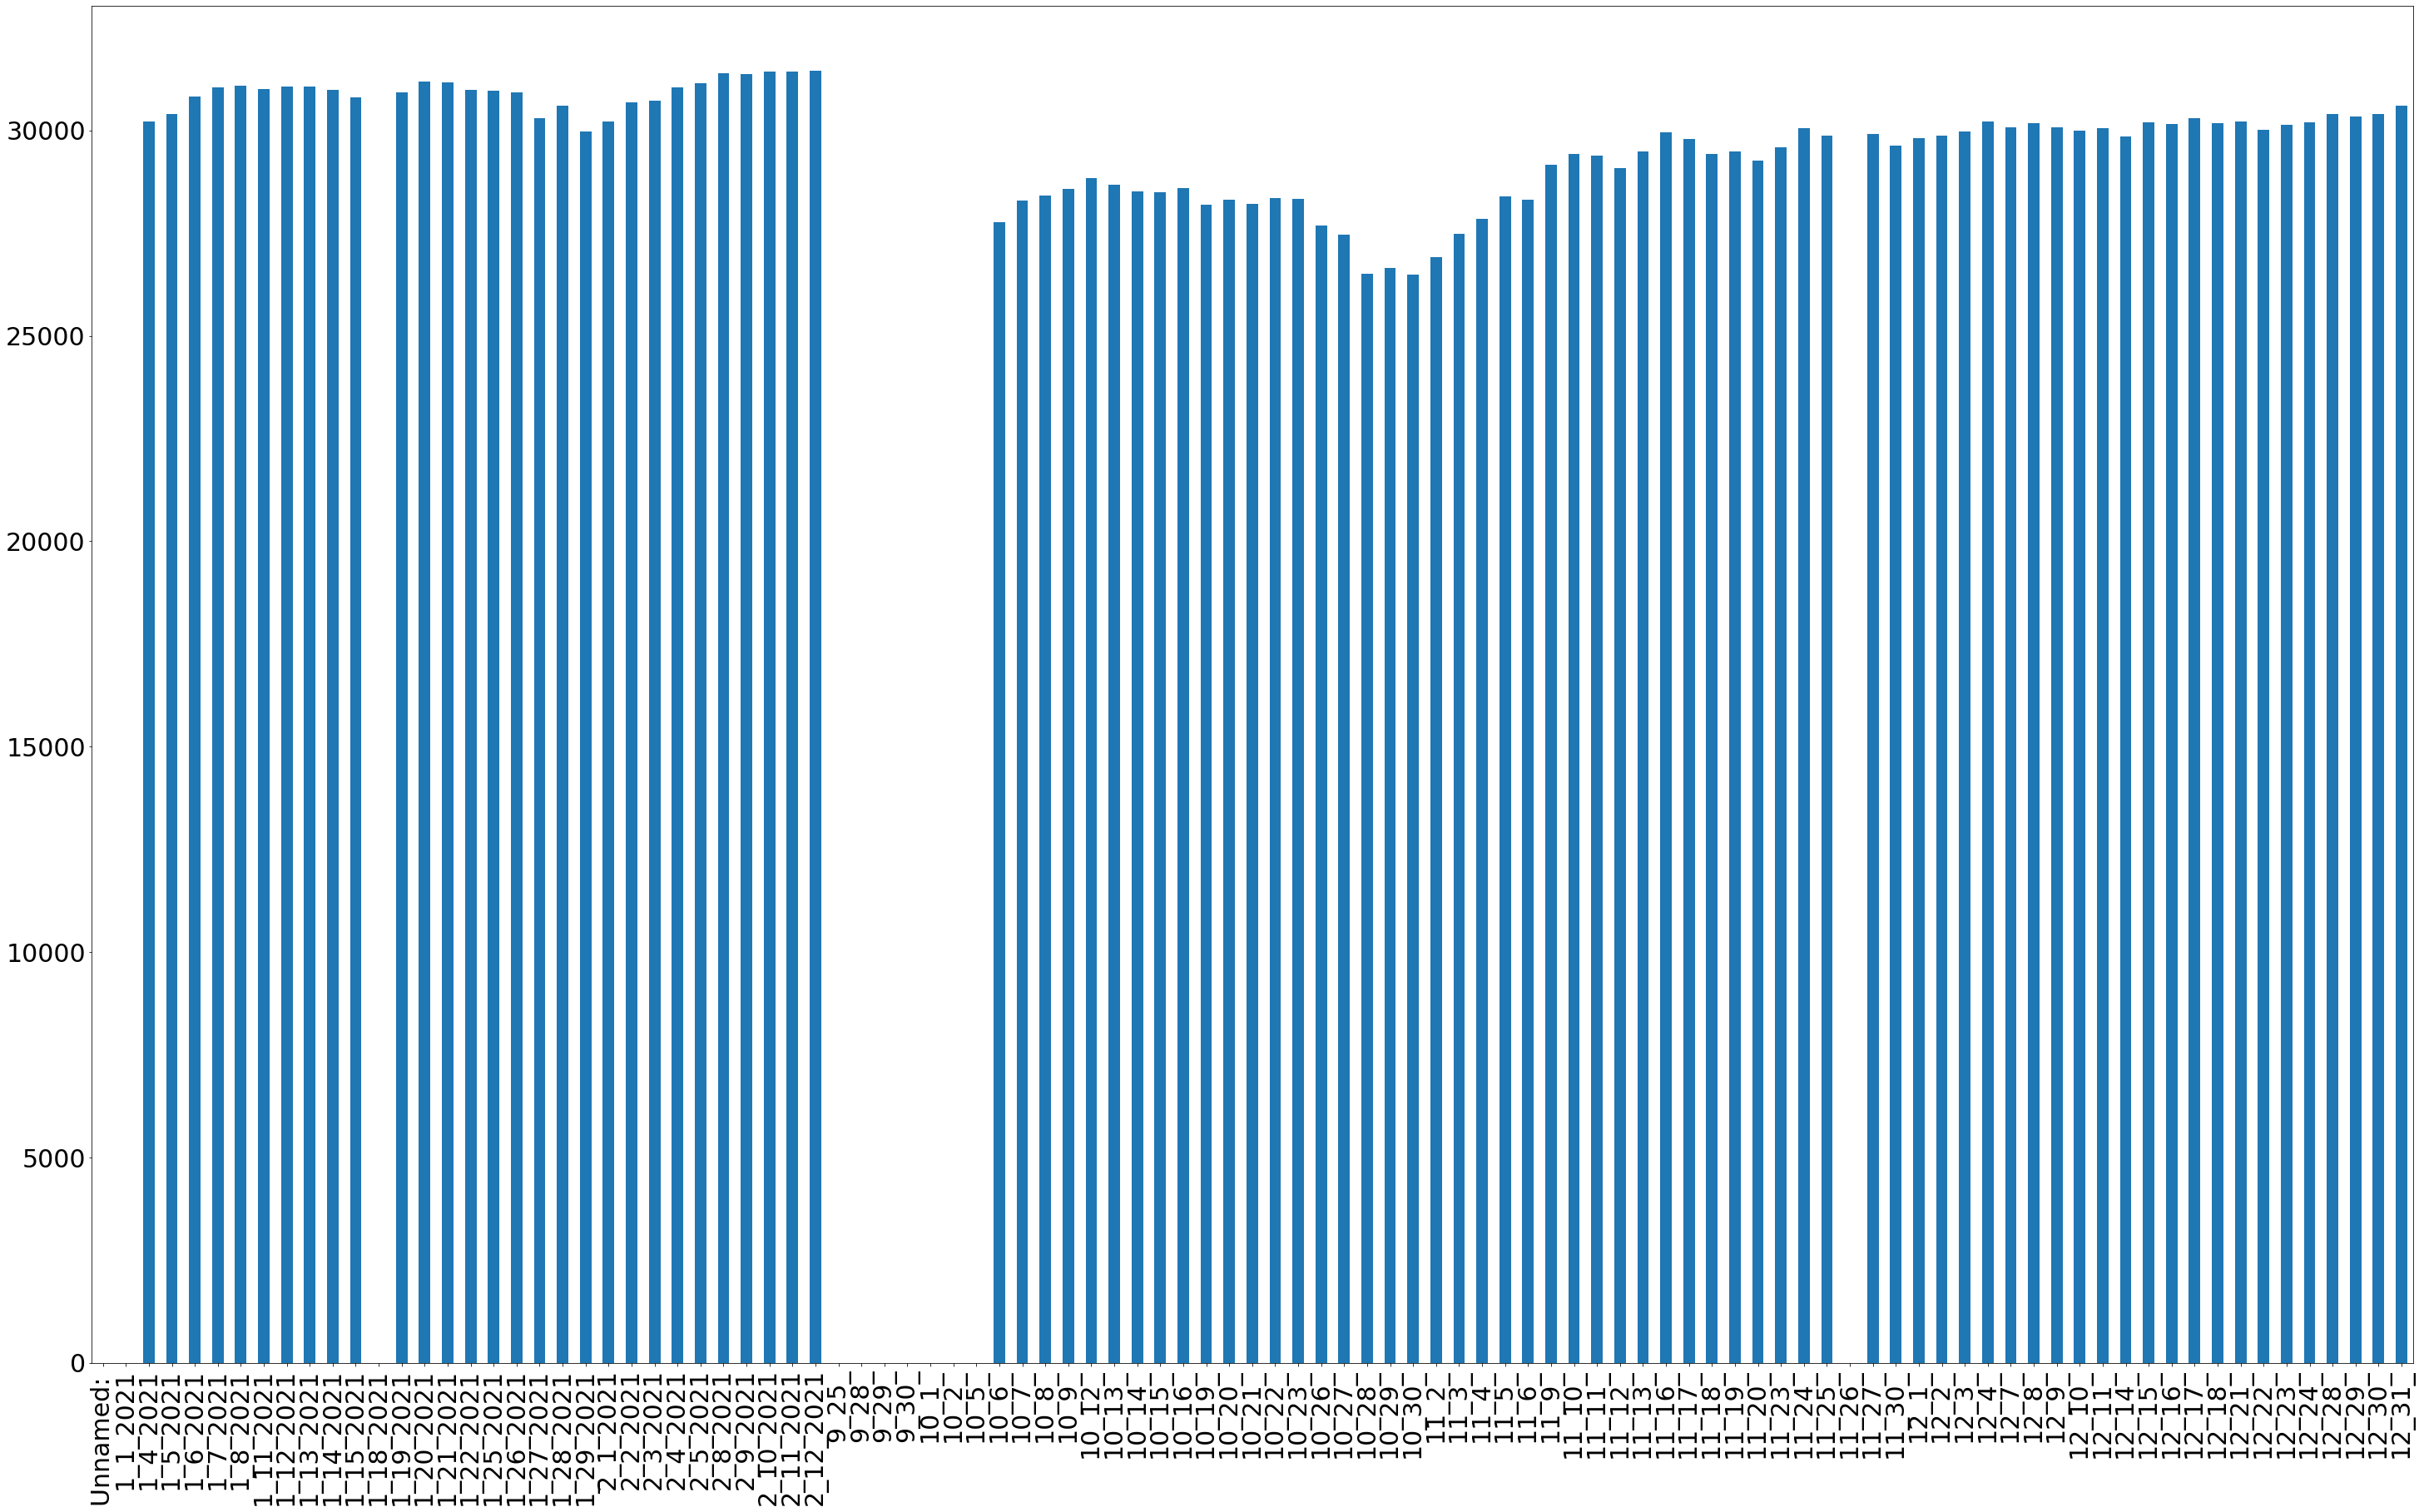

In [88]:
# Plotting a bar graph for the stock trends of Dow Jones Industrial Average. 
# The index is showing increase currently as covid cases are dropping, when COVID cases are in  peak during october, 2020 index showed lower trend  

 

  

api_data.T[3].plot.bar()
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

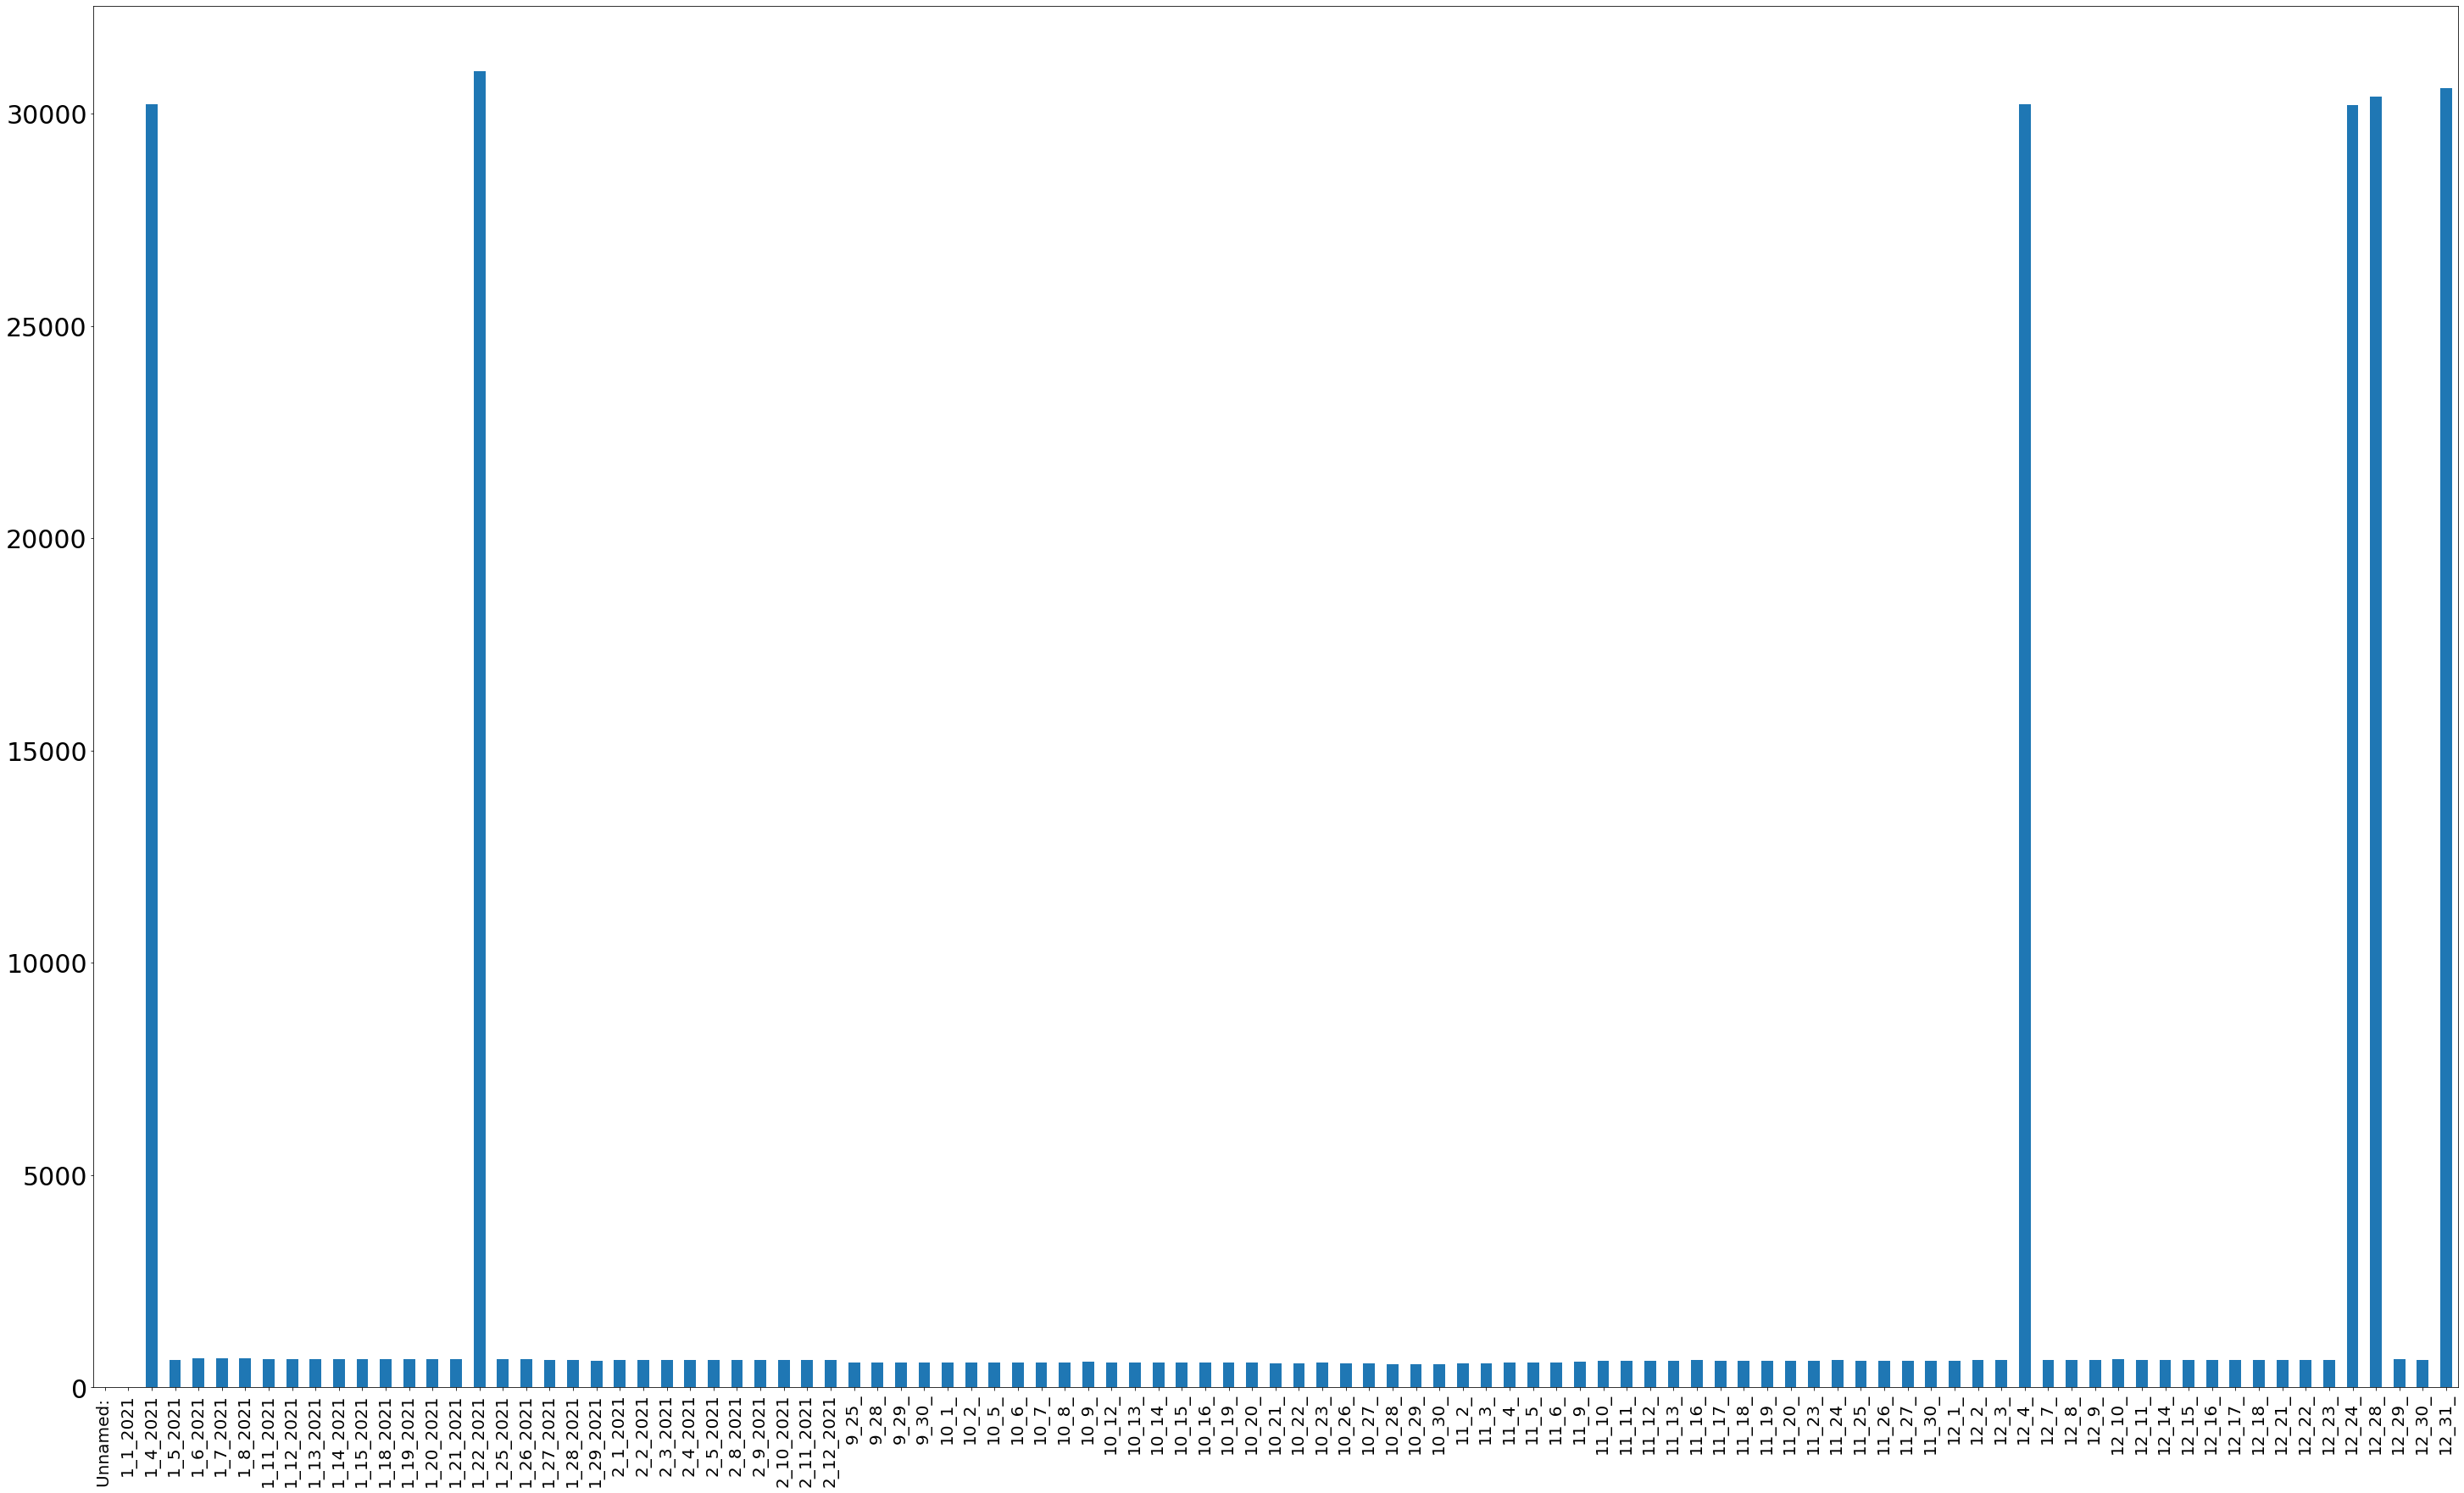

In [89]:
# Plotting a bar graph for the stock trends of CBOE UK 100 INDEX. 
. 

  
api_data.T[5].plot.bar()
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()

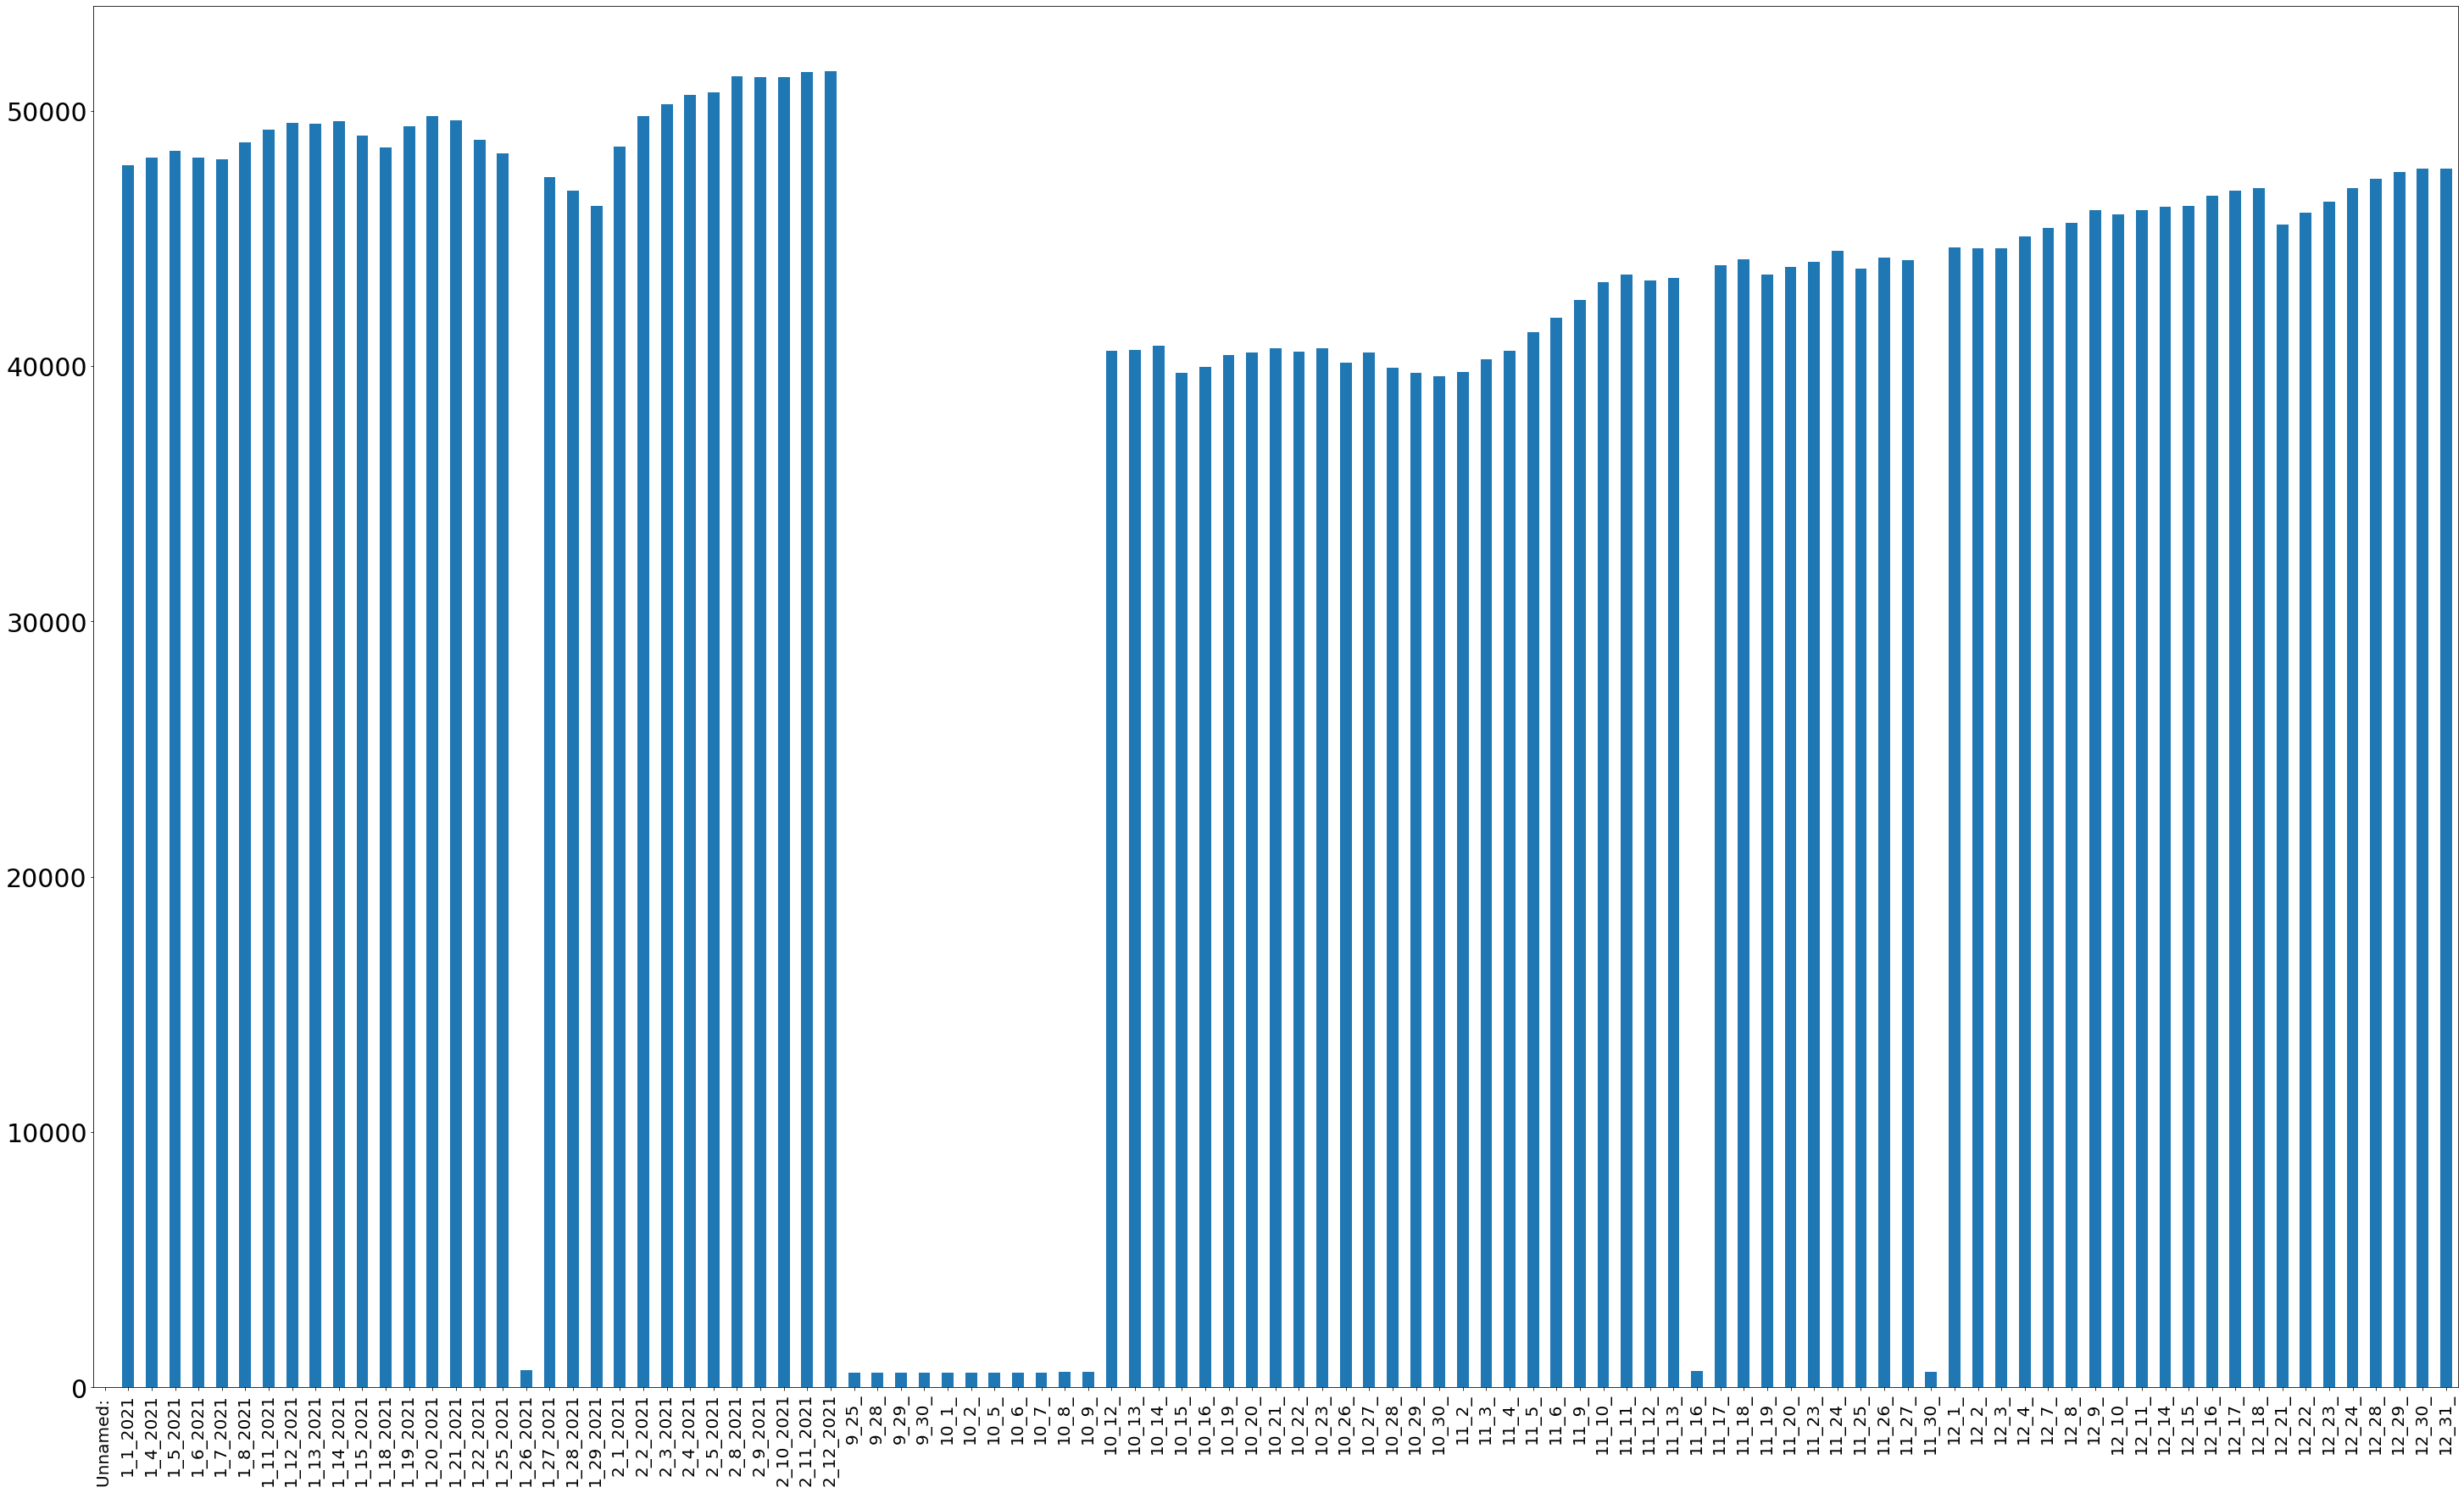

In [90]:
# Plotting a bar graph for the stock trends of S&P BSE SENSEX (^BSESN). 
# # The index is showing increase currently as covid cases are dropping

api_data.T[7].plot.bar()
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=30
plt.show()